In [1]:
# Dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
from config import gkey
from config import ow_key
import time
import pprint
import pyowm
from math import sin, cos, sqrt, atan2, radians
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#Getting the wrappers for Openweathermap and Google Cloud Maps API
owm = pyowm.OWM(ow_key)
mgr = owm.agro_manager()
from pyowm.utils.geo import Polygon as GeoPolygon
mgr = owm.agro_manager()
# Configure gmaps
gmaps.configure(api_key=gkey)

In [3]:
# We are looking the location impact on Wine Ratings

In [4]:
#Loading the initial data
wine_data = "../data/input_data/winemag-data_first150k.csv"
wine_df = pd.read_csv(wine_data)
wine_df.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [5]:
# Cleaning data and dropping columns that have more of NAN data and Unnamed columns
wine_df2=wine_df.drop(columns= ["Unnamed: 0","region_2"], axis=1)
wine_df2.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1             variety                   winery  
0        Napa Valley  Cabernet Sauvignon                    Heitz  
1               Toro       Tinta de Toro  Bodega Carmen Rodríguez  
2     Knights Valley     Sauvignon Blanc                 Macauley  
3  Willamette Valley          Pinot Noir                    Ponzi  
4             Bandol  Provence red blend     Domaine de la Bégude

In [6]:
# Drop the NAN data from the data 
dropped_wine= wine_df2.dropna()
dropped_wine.count()

country        77284
description    77284
designation    77284
points         77284
price          77284
province       77284
region_1       77284
variety        77284
winery         77284
dtype: int64

In [7]:
dropped_wine["country"].value_counts()

US           40061
Italy        13422
France        9995
Spain         6457
Argentina     3899
Australia     3307
Canada         143
Name: country, dtype: int64

In [8]:
#Using correlation analysis 
#H0: The impact of longitude on the wine rating 
#H1: The impact of latitude on the wine rating

In [9]:
#get longitude and latitude
dropped_wine['latitude']=""
dropped_wine['longitude']=""
dropped_wine.head()

/Users/Saurav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Saurav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1             variety                   winery latitude  \
0        Napa Valley  Cabernet Sauvignon                    Heitz            
1               Toro       Tinta de Toro  Bodega Carmen Rodríguez            
2     Knights Valley     Sauvignon Blanc                 Macauley            
3  Willamette Valley          Pinot Noir                    Ponzi            
4             Bandol  Provence red blend     Domaine de la Bégude            

  longitude  
0            
1            
2            
3            
4

In [10]:
#psuedo code
#The relationship between rating and location
#create a visual to show where the locations are on a google map
#then create a gradient scale to show the rating

In [11]:
#using API add the lat,long to df
latitude=[]
longitude = []
count = 0

base_url ="https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"

for index, row in dropped_wine.iterrows():
    
    # get country from df
    location = row['region_1']
    
    #run query
    query_url = base_url + "input=" + location + "&inputtype=textquery" + "&fields=geometry" + "&key=" + gkey
    
    #make API request
    results = requests.get(query_url).json()
    
    try:
        print(f"Closest winery in {location} is {results['candidates'][0]['geometry']['location']}.")
        dropped_wine.loc[index,'latitude'] = results['candidates'][0]['geometry']['location']['lat']
        dropped_wine.loc[index,'longitude'] = results['candidates'][0]['geometry']['location']['lng']

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
#Sample run. This run was done previously and saved in .csv file

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.


/Users/Saurav/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Son

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Fort Ross-Seaview is {'lat': 38.5142596, 'lng': -123.2435574}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Santa Barbara County

Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207

Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Ben Lomond Mountain is {'lat': 41.363274, 'lng': -111.960498}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -11

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.


Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alto Valle del Río Negro is {'lat': -39.03190970000001, 'lng': -67.5726237}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Santa Ynez Valley is {'l

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Terra Alta is {'lat': 41.07922569999999, 'lng': 0.3371889}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Sierra Foothills is {'lat':

Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Paso Robles Willow Creek District is {'lat': 35.5780474, 'lng': -120.7801593}.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest wi

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Ballard Canyon is {'lat': 34.6354195, 'lng': -120.1479918}.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing

Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in 

Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Clara Valley is {'lat': 37.2488478, 'lng': -121.8399593}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Missing field/result... 

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Closest winery in Nagambie Lakes is {'lat': -36.7842847, 'lng': 145.1417222}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Missing field/result... skipping.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Maremma Toscana is {'lat': 43.13439140000001, 'lng': 11.0111351}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is 

Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Close

Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Grand Valley is {'lat': 42.9744684, 'lng': -85.86976120000001}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Colorado is {'lat': 39.5500507, 'lng': -105.7820674}.
Closest winery in Cochise County is {'lat': 31.82845799999999, 'lng': -109.949686}.
Missing field/result... skipping.
Closest winery in Grand Valley is {'lat': 42.9744684, 'lng': -85.86976120000001}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest wine

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Ancient Lakes is {'lat': 47.1508517, 'lng': -119.9631178}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Okanagan Va

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Lake Che

Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Missing field/result... skipping.
Closest winery in Yolo County is {'lat': 38.7646021, 'lng': -121.9017954}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Salta is {'lat': -24.7821269, 'lng': -65.4231976}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Alsace is {'lat': 48.31

Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Marin County is {'lat': 38.083403, 'lng': -122.7633036}.
Closest winery in Pommard is {'lat': 47.00931, 'lng': 4.795325}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Santenay is {'lat': 46.912833, 'lng': 4.696534}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace i

Missing field/result... skipping.
Closest winery in Greco di Tufo is {'lat': 41.0102801, 'lng': 14.8275237}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Fronsac is {'lat': 44.924318, 'lng': -0.2712629}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Bolgheri Superio

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Touraine is {'lat': 47.3020954, 'lng': 0.6921741}.
Missing field/result... skipping.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Santa Lucia Highlan

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Salta is {'lat': -24.7821269, 'lng': -65.4231976}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Côtes de Bergerac is {'lat': 44.790031, 'lng': -0.118248}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest wine

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Missing field/result... skipping.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': 

Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Missing field/result... skipping.
Closest winery in Snipes Mountain is {'lat': 46.3285409, 'lng': -120.0082522}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Live

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Closest winery in Gaillac is {'lat': 43.9018159, 'lng': 1.896506}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Terrazze Retiche di Sondrio is {'lat': 46.187388, 'lng': 10.1095345}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Mendoza is {'lat': -3

Closest winery in Arizona is {'lat': 34.0489281, 'lng': -111.0937311}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Côtes de Bourg is {'lat': 45.040507, 'lng': -0.555353}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Fiddletown is {'lat': 38.5039105, 'lng': -120.7565689}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Campania is {'lat': 41.10994729999999, 'lng': 14.8475139}.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Alsace

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Columbia Gorge (OR) is {'lat': 45.7247667, 'lng': -121.5718789}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Carmel Valley is {'lat': 36.4799024, 'lng': -121.7327931}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Lake Cou

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Missing field/result... skipping.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Closest winery in Côtes de Provence Sainte-Victoire is {'lat': 43.5319728, 'lng': 5.

Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Arizona is {'lat': 34.0489281, 'lng': -111.0937311}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999

Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Saint-Mont is {'lat': 43.650444, 'lng': -0.147616}.
Closest winery in Saint-Mont is {'lat': 43.650444, 'lng': -0.147616}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery 

Missing field/result... skipping.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Terre Siciliane is

Missing field/result... skipping.
Closest winery in Mâcon-Lugny is {'lat': 46.471672, 'lng': 4.80982}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alto Adige Valle Isarco is {'lat': 46.9462743, 'lng': 11.4508465}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Napa Valley is {'lat': 38.502468

Closest winery in Menetou-Salon is {'lat': 47.2320769, 'lng': 2.488352}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.

Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Alsace is {'lat': 48.318179

Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Missing field/result... skipping.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.
Closest winery in Gaillac is {'lat': 43.9018159, 'lng': 1.896506}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Missing field/result... skipping.
Closest winery in Terra Alta is {'lat': 41.07922569999999, 'lng': 0.3371889}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Alexander Valley is {'lat': 3

Missing field/result... skipping.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Luberon is {'lat': 43.796111, 'lng': 5.223889}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winer

Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest w

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Santa Clara Valley is {'lat': 37.2488478, 'lng': -121.8399593}.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng':

Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in McMinnville is {'lat': 45.21011619999999, 'lng': -123.1987163}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Gevrey-Chambertin is {'lat': 47.225962, 'lng': 4.968738999999999}.
Missing field/result... skipping.
Closest winery in Meursault-Blagny is {'lat': 46.9593433, 'lng': 4.7415055}.
Closest winery in Chevalier-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Missing field/result... skipping.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -

Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result.

Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Paso Robles is {'lat':

Closest winery in Friuli Grave is {'lat': 45.914153, 'lng': 12.661697}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Côtes de Provence Sainte-Victoire is {'lat': 43.5319728, 'lng': 5.6127511}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Contra Costa County is {'lat': 37.8534093, 'lng': -121.9017954}.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Dundee Hills is {'lat': 45.27

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Reuilly is {'lat': 47.085426, 'lng': 2.041587}.
Closest winery in Idaho is {'lat': 44.0682019, 'lng': -114.7420408}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Dunnigan Hills is {'lat': 38.794346, 'lng': -121.9552466}.
Missing field/result... skipping.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Missouri is {'lat': 37.9642529, 'lng': -91.8318334}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Spain is {'lat': 40.46366700000001, 'lng': -3.74922}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia

Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Calatayud is {'l

Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Salta is {'lat': -24.7821269, 'lng': -65.4231976}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/r

Missing field/result... skipping.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Perdriel is {'lat': -33.0764292, 'lng': -68.886894

Closest winery in Morey-Saint-Denis is {'lat': 47.195673, 'lng': 4.962496}.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Côtes de Provence La Londe is {'lat': 43.138622, 'lng': 6.235208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Vosne-Romanée is {'lat': 47.159051, 'lng': 4.954572}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Russian River Valley is {'lat': 38.9119

Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in San Benito County is {'lat': 36.5760883, 'lng': -120.9876321}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alsace is {'la

Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest win

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Gaillac is {'lat': 43.9018159, 'lng': 1.896506}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Saint-Mont is {'lat': 43.650444, 'lng': -0.147616}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... sk

Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Arbois is {'lat': 46.902851, 'lng': 5.772342}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122

Closest winery in Aglianico del Taburno is {'lat': 41.1308729, 'lng': 14.6472491}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Salina is {'lat': 38.8402805, 'lng': -97.61142369999999}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Vermentino di Sardegna is {'lat': 40.804732, 'lng': 9.321736999999999}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in D

Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Finger Lakes is {

Missing field/result... skipping.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in La Consulta is {'lat': -33.7339291, 'lng': -69.1199066}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closes

Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Vernaccia di San Gimignano is {'lat': 43.4675779, 'lng': 11.0415138}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Middleburg is {'lat': 38.9687211, 'lng': -77.7355496}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Missing field

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Chianti Rufina is {'lat': 43.8253551, 'lng': 11.4893648}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alsace is 

Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Alicante is {'lat': 38.3459963, 'lng': -0.4906855}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Mis

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Missing field/result... skipping.
Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.8868944}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.


Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest 

Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Prosecco di Conegliano is {'lat': 45.8848734, 'lng': 12.29857}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in

Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Chelan County is {'lat': 47.9445331, 'lng': -120.6749068}.
Missing field/result... skipping.
Closest winery in Saumur is {'lat': 47.260135, 'lng': -0.08089299999999999}.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Navarra is {'lat'

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Cariñena is {'lat': 41

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Australia is {'lat': -25.274398, 'lng': 133.775136}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
M

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Leverano is {'lat': 40.2896113, 'lng': 18.0004304}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Perdriel is {'lat': -33.0764292, 'lng': -68.8868944}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery

Closest winery in Trebbiano d'Abruzzo is {'lat': 42.829635, 'lng': 13.775718}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/resul

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in France is {'lat': 46.227638, 'lng': 2.213749}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is 

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Trebbiano d'Abruzzo is {'lat': 42.829635, 'lng': 13.775718}.
Closest winery in Fiano di Avellino is {'lat': 40.9232653, 'lng': 14.8318223}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Luján de Cuyo is {'lat': 

Closest winery in Primitivo di Manduria is {'lat': 40.3996163, 'lng': 17.6367121}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Vermentino di Sardegna is {'lat': 40.804732, 'lng': 9.321736999999999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}

Missing field/result... skipping.
Closest winery in Dolcetto d'Alba is {'lat': 44.6885664, 'lng': 8.030807}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Dolcetto di Dogliani Superiore is {'lat': 44.5525276, 'lng': 7.9210805}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Vermentino di Sardegna is {'lat': 40.80

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mornington Peninsula is {'lat': -38.2854053, 'lng': 145.093449}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Cl

Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Californ

Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Cannonau di Sardegna is {'lat': 39.7716628, 'lng': 8.5766248}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing fie

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.6157252, 'lng': -4.450980800000001}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Vermentino di Sardegna is {'lat': 40.804732, 'lng': 9.321736999999999}.
Closest winery in Conca de Barberà is {'lat': 41.4745038, 'lng': 1.2506002}.
Missing field/result... skipping.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Yecla is {'lat': 38.6122134, 'l

Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Torgiano is {'lat': 43.043267, 'lng': 12.4495221}.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Closest winery in Santa 

Missing field/result... skipping.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Southeastern New England is {'lat': 41.639755, 'lng': -70.925861}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest win

Closest winery in Monterey-Santa Cruz is {'lat': 36.9741171, 'lng': -122.0307963}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Eola-Amity Hills is {'lat

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Trebbiano d'Abruzzo is {'lat': 42.829635, 'lng': 13.775718}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Cahors is {'lat': 44.44752

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Missing field/result... skipping.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
M

Missing field/result... skipping.
Closest winery in Coteaux du Languedoc Pic Saint Loup is {'lat': 43.780392, 'lng': 3.813078}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closes

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Montepulciano d'Abruzzo

Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery 

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Russian

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/resu

Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Napa Vall

Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 

Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Uclés is {'lat': 39.9799887, 'lng': -2.8633215}.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Clo

Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.383

Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Perdriel is {'lat': -33.0764292, 'lng': -68.8868944

Missing field/result... skipping.
Closest winery in Humboldt County is {'lat': 40.7450055, 'lng': -123.8695086}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.8868944}.
Closest winery in Vin Santo d

Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0

Closest winery in Offida Passerina is {'lat': 42.9294924, 'lng': 13.7001208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Campania is {'lat': 41.10994729999999, 'lng': 14.8475139}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Napa County is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Passito di Pantelleria is {'lat': 36.785262, 'lng': 11.9918779}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'ln

Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Montilla-Moriles is {'lat': 37.5793753, 'lng': -4.6545727}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in San Benito County is {'lat': 36.5760883, 'lng': -120.9876321}.
Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Closest winery in Montilla-Moriles is {'lat': 37.5793753, 'lng': -4.6545727}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Santa Lucia Highlands is {'lat

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Missing fiel

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Moscadello di Montalcino is {'lat': 43.0551015, 'lng': 11.4890032}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Mis

Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing fi

Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Toscana is {'lat': 43.7710513,

Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Beamsville Bench is {'lat': 43.1588716, 'lng': -79.4921646}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Carmignano is {'lat': 43.8007472, 'lng': 11.0146187}.
Missing field/result... skipping.
Closest winery in Gaillac is {'lat': 43.9018

Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Tasmania is {'lat': -41.4545196, 'lng': 145.9706647}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Carmel Valley is {'lat': 36.4799024, 'lng': -121.7327931}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387

Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Napa County is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Manzanilla-Sanlúcar de Barrameda is {'lat': 36.7755936, 'lng': -6.3427813}.
Missing field/result... skipping.
Closest winery in Menfi is {'lat': 37.6198182, 'lng': 12.9665821}.
Closest winery in Bourgueil is {'lat': 47.282487, 'lng':

Missing field/result... skipping.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in Calistoga is {'lat': 38.5787965, 'lng': -122.5797054}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Saint-Mont is {'lat': 43.650444, 'lng': -0.147616}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Chénas is {'lat': 46.212457, 'lng': 4.719626}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Columbia Va

Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Montilla-Moriles is {'lat': 37.5793753, 'lng': -4.6545727}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Humboldt County is {'lat': 40.7450055,

Missing field/result... skipping.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Missing field/result... skipping.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Sant'Antimo is {'lat': 40.9420301, 'lng': 14.2308738}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.23

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Niagara-On-The-Lake is {'lat': 43.2549988, 'lng': -79.0772616}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7

Missing field/result... skipping.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Sicilia is {'lat': 37.5999938, 'l

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Old Mission Peninsula is {'lat': 44.8839492, 'lng': -85.50972259999999}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Uclés is {'lat': 39.9799887, 'lng': -2.8633215}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat

Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing fiel

Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng

Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Touraine is {'lat': 47.3020954, 'lng': 0.6921741}.
Closest winery in Crémant de Loire is {'lat': 48.014277, 'lng': 3.088529}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest wine

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng':

Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest wine

Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Alto Adige Valle Isarco is {'lat': 46.9462743, 'lng': 11.4508465}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Missing field/result... skipping.
Missing field/

Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Costers del Segre is {'lat': 41.599156, 'lng': 0.5812269999999999}.
Closest winery in Valle d'Aosta is {'lat': 45.7388878, 'lng': 7.426186599999999}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Russian River Valley is {'lat': 38.9119

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Santenay is {'lat': 46.912833, 'lng': 4.696534}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Menetou-Salon is {'lat': 47.2320769, 'lng': 2.488352}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result..

Closest winery in Alicante is {'lat': 38.3459963, 'lng': -0.4906855}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Va

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Fiddletown is {'lat': 38.5039105, 'lng': -120.7565689}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Sagrantino di Montefalco is {'lat': 42.8934918, 'lng': 12.6529761}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Marg

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Côtes de Duras is {'lat': 44.6696359, 'lng': 0.1856519}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closes

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Snipes Mountain is {'lat': 46.3285409, 'lng': -120.0082522}.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Vosne-Romanée is {'lat': 47.159051, 'lng': 4.954572}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Contra Costa County is {'lat': 37.8534093, 'lng': -121.9017954}.
Missing field/result...

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Vall

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Missing field/result... skipping.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701

Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Juliénas is {'lat': 46.235505, 'lng': 4.709970999999999}.
Closest winery in Mokelumne River is {'lat': 38.1097595, 'lng': -121.5749849}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.4885

Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Perdriel is {'lat': -33.0764292, 'lng': -68.8868944}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Prosecco Treviso is {'lat': 45.6651108, 'lng': 12.247662}.
Closest winery in Lambrusco Grasparossa di Castelvetro is {'lat': 44.5180549, 'lng': 10.9292401}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.88689

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Snipes Mountain is {'lat': 46.3285409, 'lng': -120.0082522}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Bourgueil is {'lat': 47.282487, 'lng': 0.168611}.
Missing field/result... skipping.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Clo

Closest winery in Vin de France is {'lat': 46.9529085, 'lng': -0.6000253}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Mediterranée is {'lat': 34.5531284, 'lng': 18.0480105}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
M

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sangiovese di Romagna Superiore is {'lat': 44.0377492, 'lng': 11.9947399}.
Missing field/result... skipping.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Missing field/result... skipping.
Closest winer

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Yecla is {'lat': 38.6122134, 'lng': -1.110112}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Missing field/result... skipping.
Closest w

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Costa Toscana is {'lat': 43.5237323, 'lng': 10.329677}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Yecla is {'lat': 38.6122134, 'lng': -1.110112}.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Rías Baixas 

Closest winery in Haut-Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Missing field/result... skipping.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Missing field/result... skipping.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Placer County is {'lat': 39.0915751, 'lng': -120.8039474}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -6

Closest winery in Romagna is {'lat': 44.5967607, 'lng': 11.2186396}.
Closest winery in Prosecco Treviso is {'lat': 45.6651108, 'lng': 12.247662}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Missing field/result... skipping.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Australia is {'lat': -25.274398, 'lng': 133.775136}.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mâcon-Chardonnay is {'lat': 46.501812, 'lng': 4.874842}.
Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'l

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.43835

Closest winery in Getariako Txakolina is {'lat': 43.3026416, 'lng': -2.2042824}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Marin County is {'lat': 38.083403, 'lng': -122.7633036}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Puget Sound is {'lat': 47.7236535, 'lng': -122.4713352}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Cariñena is {'lat': 41.3370805, 

Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Missing field/result... skipping.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Closest winery in Chambolle-Musigny is {'lat': 47.185496, 'lng': 4.952888}.
Missing field/result... skipping.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.61701

Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Paicines is {'lat': 36.7289127, 'lng': -121.2788708}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.


Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Paso Robles is {'lat': 35.6

Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Alicante is {'lat': 38.3459963, 'lng': -0.4906855}.
Closest winery in Alicante is {'lat': 38.3459963, 'lng': -0.4906855}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Shenan

Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Muscat de Beaumes de Venise is {'lat': 44.121721, 'lng': 5.031427}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -12

Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Veneto is {'lat': 45.4414662, 'lng': 12.3152595}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santenay is {'lat': 46.912833, 'lng': 4.696534}.
Closest winery in Santenay is {'lat': 46.912833, 'lng': 4.696534}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russia

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Mendoza is {'lat': -32.8894587, 'ln

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Bierzo is {'lat'

Closest winery in Santa Clara Valley is {'lat': 37.2488478, 'lng': -121.8399593}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Delle Venezie is {'lat': 45.6320327, 'lng': 12.5869216}.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Missing field/result... skipping.
Closest winery in Maremma Toscana is {'lat': 43.13439140000001, 'lng': 11.0111351}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904,

Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Saint-Véran is {'lat': 44.700836, 'lng': 6.868570999999999}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Montepulciano d'Abr

Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Bolgheri Sassicaia is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in Santa Ynez

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Terre Siciliane is {'lat': 37.8325869, 'lng': 15.2620168}.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Lake County is {'lat': 42.3689363,

Missing field/result... skipping.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Côte de Brouilly is {'lat': 45.844705, 'lng': 4.40916}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... ski

Closest winery in Castel del Monte is {'lat': 41.0847777, 'lng': 16.2706484}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result...

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Toscana is {'lat': 43.7710

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in McMinnville is {'lat': 45.21011619999999, 'lng': -123.1987163}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng

Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Northern Sonoma is {'lat': 38.2889769, 'lng': -122.4586763}.
Closest winery in Banyuls is {'lat': 42.48343, 'lng': 3.128874}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Conero is {'lat': 43.55, 'lng': 13.6}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Castillon Côtes de Bordeaux is {'lat': 44.8533003, 'lng': -0.0436106}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Amador County is {'lat': 38.34889

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Long Island is {'lat': 40.789142, 'lng': -73.13496099999999}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipp

Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa County is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Piave is {'lat': 46.1349922, 'lng': 12.227916}.
Closest winery in McLaren Vale-Adelaide Hills is {'lat': -35.2462077, 'lng': 138.55089}.
Closest winery in Ribera del Duero

Closest winery in Yamhill-Carlton District is {'lat': 45.2942902, 'lng': -123.1796697}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Rosso di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.1331877

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Montefalco Rosso is {'lat': 42.88929359999999, 'lng': 12.6502843}.
Closest winery in Montefalco Sagrantino is {'lat': 42.88929359999999, 'lng': 12.6502843}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Clos

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Missing field/result... skipping.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in California is {'lat': 36.778261, 'l

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery 

Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Nap

Closest winery in Santa Barbara is {'lat': 34.4208305, 'lng': -119.6981901}.
Closest winery in Alto Adige Terlano is {'lat': 46.5384622, 'lng': 11.2421084}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Chianti Rufina is {'lat': 43.8253551, 'lng': 11.4893648}.
Cl

Missing field/result... skipping.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in McLaren Vale-Adelaide Hills is {'lat': -35.2462077, 'lng': 138.55089}.
Missing field/result... skipping.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Saint-Nicolas-de-Bourgueil is {'lat': 47.284852, 'lng': 0.12535}.
Missing field/result... skipping.
Closest winery in Fiddletown is {'lat': 38.5039105, 'lng': -120.7565689}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Calistoga is {'lat': 38.578

Missing field/result... skipping.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Fort Ross-Seaview is {'lat': 38.5142596, 'lng': -123.2435574}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Bennett Valley is {'lat': 38.420496, 'lng': -122.662446}.
Missing field/result... skipping.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Gevrey-Chambertin is {'lat': 47.225962, 'lng': 4.968738999999999}.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.447

Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Chorey-lès-Beaune is {'lat': 47.048887, 'lng': 4.86904}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Missing field/result... skipping.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Vernaccia di San Gimignano is {'lat': 43.4675779, 'lng': 11.0415138}.
Closest winery in Snipes Mountain is {'lat': 46.3285409, 'lng': -120.0082522}.
Closest winery in Finger Lakes is {'lat': 42.7238

Closest winery in Temecula Valley is {'lat': 33.505174, 'lng': -117.1442605}.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Argentina is {'lat': -38.416097, 'lng': -63.61667199999999}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083

Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.8868944}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Missing field/result... skipping.
Closest winery in Hudson River Region is {'lat': 41.9209018, 'lng': -73.9612887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in San Benito County

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Sangiovese di Romagna Superiore is {'lat': 44.0377492, 'lng': 11.9947399}.
Missing field/result... skipping.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Côtes de Provence

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest 

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Red Mountain is {'lat': 49.102

Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Veneto is {'lat': 45.4414662, 'lng': 12.3152595}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in San Benito County is {'lat': 36.5760883, 'lng': -120.9876321}.
Closest winery in Calistoga is {'lat': 38.5787965, 'lng': -122.5797054}.
Missing field/result... skipping.
Closest winer

Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Cayuga Lake is {'lat': 42.6776693, 'lng': -76.6990172}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery i

Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Gevrey-Chambertin is {'lat': 47.225962, 'lng': 4.968738999999999}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest win

Closest winery in Haut-Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Muscat de Beaumes de Venise is {'lat': 44.121721, 'lng': 5.031427}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng

Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery 

Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Carmel Valley is {'lat': 36.4799024, 'lng': -121.7327931}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Closest winery in Contra Costa County is {'lat': 37.8534093, 'lng': -121.9017954}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sant

Missing field/result... skipping.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Hudson River Region is {'lat': 41.9209018, 'lng': -73.9612887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Potter Valley is {'lat': 39.3221089, 'lng': -123.113059}.
Closest winery in Napa Valley is {

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Missing field/result... skipping.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest wi

Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in France is {'lat': 46.227638, 'lng': 2.213749}.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Saint-Chinian is {'lat': 43.418646, 'lng': 2.945129}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa County is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Walla Walla Valley (OR) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Côtes de Bergerac is {'lat': 44.790031, 'lng': -0.118248}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Pemberton is {'lat': 50.322028, 'lng': -122.8050498}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Missing field/result... skipping.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in California is {'lat': 3

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.

Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field

Missing field/result... skipping.
Closest winery in Calistoga is {'lat': 38.5787965, 'lng': -122.5797054}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Conegliano Valdobbiadene Prosecco Supe

Missing field/result... skipping.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Bourgogne Epineuil is {'lat': 47.874593, 'lng': 3.980885}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Paso Robles is {'lat': 35.

Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Côte de Brouilly is {'lat': 45.844705, 'lng': 4.40916}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Chianti Rufina is {'lat': 43.8253551, 'lng': 11.4893648}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest wine

Closest winery in McMinnville is {'lat': 45.21011619999999, 'lng': -123.1987163}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Gaillac is {'lat': 43.9018159, 'lng': 1.896506}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng'

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438

Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Gevrey-Chambertin is {'lat': 47.225962, 'lng': 4.968738999999999}.
Closest winery in Nuits-St.-Georges is

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Dolcetto di Dogliani is {'lat': 44.5300701, 'lng': 7.944972399999998}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Walla Walla Valle

Closest winery in Italy is {'lat': 41.87194, 'lng': 12.56738}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Western Australia is {'lat': -27.6728168, 'lng': 121.6283098}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Italy is {'lat': 41.8

Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Rosso di Cerignola is {'lat': 41.2656157, 'lng': 15.8936429}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field

Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Mentrida is {'lat': 40.2394809, 'lng': -4.1936206}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Rosso di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Ro

Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Temecula Valley is {'lat': 33.505174, 'lng': -117.1442605}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winer

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Carmignano is {'lat': 43.8007472, 'lng': 11.0146187}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Buzet is {'lat': 45.4075606, 'lng': 13.9651276}.
Closest winery in Rías Baixas is {'lat': 42.4270

Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, '

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Cayuga Lake is {'lat': 42.6776693, 'lng': -76.6990172}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma V

Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Montlouis-sur-Loire is {'lat': 47.38826400000001, 'lng': 0.827383}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Bennett Valley is {'lat': 38.420496, 'lng': -122.662446}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest w

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River

Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Faugères is {'lat': 43.56589779999999, 'lng': 3.1895544}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Missing field/result... skipping.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Chassagne-Montrachet is {'lat': 46.937992, 'lng': 4.729560999999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Coast is {'lat': 3

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Sable de Camargue is {'lat': 43.5831745, 'lng': 4.207903}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest 

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Vermentino di Sardegna is {'lat': 40.804732, 'lng': 9.321736999999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sicilia is {'lat': 37.599993

Missing field/result... skipping.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Australia is {'lat': -25.274398, 'lng': 133.775136}.
Missing field

Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skippin

Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mornington Peninsula is {'lat': -38.2854053, 'lng': 145.093449}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Lodi is

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Cerasuolo di Vittoria is {'lat': 36.94916260000001, 'lng': 14.5351793}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Virginia is {'lat': 3

Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skipping.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Rattlesnake Hills is {'lat': 46.42535729999999, 'lng': -120.2941059}.
Closest winery in Brouilly is {'lat': 45.844705, 'lng': 4.40916}.
Closest winery in Fiddletown is {'lat': 38.5039105, 'lng': -120.7565689}.
Closest winery in Limoux is {'lat': 43.053289, 'lng': 2.218142}.
Missing field/result... skipping.
Closest winery in Columbia Gorge (WA) is {'lat': 45.7247667, 'lng': -121.5718789}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 13

Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Monbazillac is {'lat': 44.793529, 'lng': 0.492161}.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Alta Mesa is {'lat': 29.7839417, 'lng': -95.6485443}.
Closest winery in Barbera del Monferrato is {'lat': 44.7891927, 'lng': 8.1792783}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'l

Closest winery in Mâcon-Lugny is {'lat': 46.471672, 'lng': 4.80982}.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Valpolicella Ripasso Valpantena Superiore is {'lat': 45.5333333, 'lng': 11}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Valpolicella Ripasso Valpantena is {'lat': 45.5333333, 'lng': 11}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Missing field/result... skipping.
Closest winery 

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Western Australia is {'lat': -27.6728168, 'lng': 121.6283098}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bennett Valley is {'lat': 38.420496, 'lng': -122.662446}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing 

Closest winery in Corbières-Boutenac is {'lat': 43.1461151, 'lng': 2.7942914}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Corbières-Boutenac is {'lat': 43.1461151, 'lng': 2.7942914}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Red Mountain is {'lat': 4

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Western Australia is {'lat': -27.6728168, 'lng': 121.6283098}.
Closest winery in Pla de Bages is {'lat': 41.778399, 'lng': 1.873991}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Extre

Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Missing field/result... skipping.
Closest winery in Cayuga Lake is {'lat': 42.6776693, 'lng': -76.6990172}.
Missing field/result... skipping.
Closest winery in Augusta is {'lat': 33.4734978, 'lng': -82.0105148}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Close

Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in California is

Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Contessa Entellina is {'lat': 37.7295385, 'lng': 13.1833552}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Missing field

Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Pemberton is {'lat': 50.322028, 'lng': -122.8050498}.
Closest winery in Argentina is {'lat': -38.416097, 'lng': -63.61667199999999}.
Closest winery in Clear Lake is {'lat': 38.9582307, 'lng': -122.6263728}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa

Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68

Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -

Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'ln

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Missing field/result... skipping.
Closest winery in Napa County is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in Paso R

Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Yolo County is {'lat': 38.7646021, 'lng': -121.9017954}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Finger Lakes i

Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.92972

Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Cerasuolo di Vittoria is {'lat': 36.94916260000001, 'lng': 14.5351793}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.8868944}.
Closest wi

Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Greco di Tufo is {'l

Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Fiano di Avellino is {'lat': 40.9232653, 'lng': 14.8318223}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Biferno Rosso is {'lat': 41.906962, 'lng': 14.9441244}.
Missing field/res

Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Savennières is {'lat': 47.383101, 'lng': -0.656999}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Puligny-Montrachet i

Closest winery in Greco di Tufo is {'lat': 41.0102801, 'lng': 14.8275237}.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Fiano di Avellino is {'lat': 40.9232653, 'lng': 14.8318223}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Greco di Tufo is {'lat': 41.0102801, 'lng': 14.8275237}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Côtes de Provence is {'lat': 43.4

Closest winery in San Marino is {'lat': 43.94236, 'lng': 12.457777}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Greco di Tufo is {'lat': 41.0102801, 'lng': 14.8275237}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Monticello is {'lat': 38.

Missing field/result... skipping.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng'

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sangiovese di Romagna Superiore is {'lat': 44.0377492, 'lng': 11.9947399}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Coteaux du Layon La Faye is {'lat': 47.302297, 'lng': -0.550947}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4

Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 

Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Yadkin Valley is {'lat': 36.2023597, 'lng': -80.6770787}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest wine

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Riber

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 

Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': 

Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Potter Valley is {'lat': 39.3221089, 'lng': -123.113059}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Vi de la Terra Illes Balears is {'lat': 39.5778512, 'lng': 2.6518347}.
Closest winery in Cay

Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Côtes de Provence Sainte-Victoire is {'lat': 43.5319728, 'lng': 5.6127511}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Málaga is {'lat': 36.7212737, 'lng': -4.4213988}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Clo

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat'

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Montefalco Rosso is {'lat': 42.88929359999999, 'lng': 12.6502843}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999,

Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Barossa Valley-Clare Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Saumur-Champigny is {'lat': 47.2546551, 'lng': -0.0833506}.
Closest winery in Washi

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Pennsylvania is {'lat': 41.203

Closest winery in Touraine is {'lat': 47.3020954, 'lng': 0.6921741}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Limestone Coast is {'lat'

Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -

Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Yolo County is {'lat': 38.7646021, 'lng': -121.9017954}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.9

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Côtes de Bourg is {'lat': 45.040507, 'lng': -0.555353}.
Closest

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Edna Va

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Chassagne-Montrachet is {'lat': 46.937992, 'lng': 4.729560999999999}.
Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in San Benito County is

Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Missing field/result... skipping.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in California is {'lat'

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat'

Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Missing field/result... skipping.
Closest winery in France is {'lat': 46.227638, 'lng': 2.213749}.
Closest winery in Italy is {'lat': 41.87194, 'lng': 12.56738}.
Closest winery in Italy is {'lat': 41.87194, 'lng': 12.56738}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Alexander Valley is {'lat': 38

Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery 

Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Crémant de Loire is {'lat': 48.014277, 'lng': 3.088529}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Cariñena is {'lat': 41.3370805, 'ln

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in La Consulta is {'lat': -33.7339291, 'lng': -69.1199066}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Yecla is {'lat': 38.6122134, 'lng': -1.110112}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Napa Valle

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Saumur is {'lat': 47.260135, 'lng': -0.08089299999999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Friuli Grave is {'lat': 45.914153, 'lng': 12.661697}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.08

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Hermitage is {'lat': 59.939

Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Côtes du Rhône Villages is {'lat': 4

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Dolcetto d'Alba is {'lat': 44.6885664, 'lng': 8.030807}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Walla

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Contra Costa County is {'lat': 37.8534093, 'lng': -121.9017954}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Missing field/result... skipping.
Closest winery in Yecla is {'lat': 38.6122134, 'lng': -1.110112}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'l

Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in 

Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Savennières is {'lat': 47.383101, 'lng': -0.656999}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Lenswood is {'lat': -34.9172455, 'lng': 138.8315666}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosec

Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Snipes Mountain is {'lat': 46.3285409, 'lng': -120.0082522}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Coonawarra is {'lat': -

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Salta is {'lat': -24.7821269, 'lng': -65.4231976}.
Closest winery in Vin Santo di Montepulciano is {'lat': 43.090356, 'lng': 11.781025}.
Closest winery in Vin Santo di Montepulciano is {'lat': 43.090356, 'lng': 11.781025}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Chevalier-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
C

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Pommard is {'lat': 47.00931, 'lng': 4.795325}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Clo

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Vosne-Romanée is {'lat': 47.159051, 'lng': 4.954572}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Perdriel is {'lat': -33.076429

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Gorge (OR) is {'lat': 45.7247667, 'lng': -121.5718789}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -

Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Dry Creek Valley is {'lat': 39.26

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closes

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Missing field/result... skipping.
Closest winery in Pommard is {'lat': 47.00931, 'lng': 4.795325}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Missing field/result... skipping.
Closest winery in Napa Val

Missing field/result... skipping.
Closest winery in Argentina is {'lat': -38.416097, 'lng': -63.61667199999999}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/r

Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Friuli Grave is {'lat': 45.9

Closest winery in Friuli Grave is {'lat': 45.914153, 'lng': 12.661697}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Missing field/result... skipping.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'l

Closest winery in Colli di Conegliano is {'lat': 45.889197, 'lng': 12.3006368}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Trentino is {'lat': 46.0512004, 'lng': 11.1175392}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is 

Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Clear Lake is {'lat': 38.9582307, 'lng': -122.6263728}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': 

Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing fiel

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Missing field/result... skipping.
Missing field/result... skipping.
M

Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sierra Foothills

Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Nagambie Lakes is {'lat': -36.7842847, 'lng': 145.1417222}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Bennett Valley is {'lat': 38.420496, 'lng': -122.662446}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Morey-Saint-Denis is {'lat': 47.195673, 'lng': 4.962496}.

Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skippi

Closest winery in Augusta is {'lat': 33.4734978, 'lng': -82.0105148}.
Missing field/result... skipping.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Santa Cruz Mountains is {'lat':

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng

Missing field/result... skipping.
Closest winery in Mornington Peninsula is {'lat': -38.2854053, 'lng': 145.093449}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Missing field/result... skipping.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Nap

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Missing field/result... skipping.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Haut-Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng'

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Jerez is {'lat': 36.68

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Pemberton is {'lat': 50.322028, 'lng': -122.8050498}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Valdobbiadene Superiore di Cartizze is {'lat': 45.9012514, 'lng': 11.9958811}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Clo

Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Salice Salentino is {'lat': 40.385073, 'lng': 17.9652521}.
Missing field/result... skippin

Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Muscat de Beaumes de Venise is {'lat': 44.121721, 'lng': 5.031427}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Primitivo di Manduria is {'lat': 40.3996163, 'lng': 17.6367121}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Clo

Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Murgia is {'lat': 40.976111, 'lng': 16.406111}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Vermentino di Gallura is {'lat': 40.8051102, 'lng': 9.321366399999999}.
Closest winery in Paso Robles is 

Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in North Carolina is {'lat': 35.7595731, 'lng': -79.01929969999999}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'la

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Menfi is {'lat': 37.6198182, 'lng': 12.9665821}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Friuli is {'lat': 46.2259177, 'lng': 13.1033646}.
Close

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': 

Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Catalunya is {'lat': 41.5911589, 'lng': 1.5208624}.
Closest winery in Rattlesnake Hills is {'lat': 46.42535729999999, 'lng': -120.2941059}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Catalunya is {'lat': 41.5911589, 'lng': 1.5208624}.
Closest winery in Russi

Closest winery in Roccamonfina is {'lat': 41.2928103, 'lng': 13.9851231}.
Closest winery in Haut-Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Missing field/result... skipping.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Haut-Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.4

Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Missing field/result... skipping.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Closest winery in Temecula Valley is {'lat': 33.505174, 'lng': -117.1442605}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.17935

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Bandol is {'lat': 43.136418, 'lng': 5.754186}.
Closest winery in Northern Sonoma is {'lat': 38.2889769, 'lng': -122.4586763}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Fitou is {'lat': 42.893306, 'lng': 2.978041}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian R

Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in El Dorado County is {'lat': 38.74263759999999, 'lng': -120.4357631}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa Clara Valley is {'lat': 37.2488478, 'lng': -121.8399593}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, '

Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Missing field/result... skipping.
Closest winery in Idaho is {'lat': 44.0682019, 'lng': -114.7420408}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Virginia's Eastern Shore is {'lat': 37.132334, 'lng': -75.96601179999999}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Cadillac Côtes de Bordeaux is {'lat': 44.6330907, 'lng': -0.315478}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Cl

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'l

Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Closest winery in Calistoga is {'lat': 38.5787965, 'lng': -122.5797054}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Chehal

Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Veneto is {'lat': 45.4414662, 'lng': 12.3152595}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest win

Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Faugères is {'lat': 43.56589779999999, 'lng': 3.1895544}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Russian River Valley is {'lat': 38.9119799, '

Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Ramona Valley is {'lat': 33.0466939, 'lng': -116.8591631}.
Closest winery in Vino de la Tierra del Bajo Aragón is {'lat': 40.89924999999999, 'lng': -0.364891}.
Closest winery in Temecula Valley is {'lat': 33.505174, 'lng': -117.1442605}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest wine

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.

Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Montagne-Saint-Émilion is {'lat': 44.93028530000001, 'lng': -0.1301373}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3

Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Lussac Saint-Émilion is {'lat': 44.949033, 'lng': -0.096263}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.

Closest winery in Conero is {'lat': 43.55, 'lng': 13.6}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Abruzzo is {'lat': 42.1920119, 'lng': 13.7289167}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Closest winery in The Hamptons, Long Island is {'lat': 40.924616, 'lng': -72.35479149999999}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in 

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Pécharmant is {'lat': 44.86747099999999, 'l

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Montefalco Rosso is {'lat': 42.88929359999999, 'lng': 12.6502843}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Closest winery in Limoux is {'lat': 43.053289, 'lng': 2.218142}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in The Hamptons, Long Island is {'lat': 40.924616, 'lng': -72.35479149999999}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Dry Creek Valley is {'lat': 39.261442

Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Saint-Nicolas-de-Bourgueil is {'lat': 47.284852, 'lng': 0.12535}.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery i

Closest winery in Perdriel is {'lat': -33.0764292, 'lng': -68.8868944}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Conero is {'lat': 43.55, 'lng': 13.6}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Yamhill-Carlton District is {'lat': 45.2942902, 'lng': -123.1796697}.
Closest winery in Alta Mesa is {'lat': 29.7839417, 'lng': -95.6485443}.
Missing field/result... skipping.
Closest winery in Redwood Valley is {'lat': 39.2652491, 

Closest winery in Humboldt County is {'lat': 40.7450055, 'lng': -123.8695086}.
Missing field/result... skipping.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Umpqua Valley is {'lat': 43.2113549, 'lng': -123.3464928}.
Closest winery in Conero is {'lat': 43.55, 'lng': 13.6}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Santa Lucia Highlands is {'

Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}

Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Cannonau di Sardegna is {'lat': 39.7716628, 'lng': 8.5766248}.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.8868944}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Molise is {'lat': 41.67388649999999, 

Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Aloxe-Corton is {'lat': 47.065692, 'lng': 4.85994}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.67

Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Gevrey-Chambertin is {'lat': 47.225962, 'lng': 4.968738999999999}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Columbia Gorge (WA) is {'lat': 45.7247667, 'lng': -121.5718789}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -1

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Missing field/result... skipping.
Closest winery in Morey-Saint-Denis is {'lat': 47.195673, 'lng': 4.962496}.
Missing field/result... skipping.
Closest winery in Spain is {'lat': 40.46366700000001, 'lng': -3.74922}.
Missing field/result... skipping.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Close

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Salta is {'lat': -24.7821269, 'lng': -65.4231976}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Haut-Médoc is {'lat': 44.556862, '

Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.325100

Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Columbia Vall

Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Piedmont is {'lat': 45.0522366, 'lng'

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Missing field/result... skipping.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Missing field/result... skipping.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Dry Creek 

Closest winery in Pernand-Vergelesses is {'lat': 47.084575, 'lng': 4.851313}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Cl

Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Missing field/result... skipping.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Missing field/result... skipping.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Missing field/result... skipping.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.

Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Closest winery in Calabria is {'lat': 39.3087714, 'lng': 16.3463791}.
Missing field/result... skipping.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Red Hills Lake County is {'lat'

Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Primitivo di Manduria is {'lat': 40.3996163, 'lng': 17.6367121}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Piedmont is {'lat': 45.0522366, 'lng': 7.5153885}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
M

Missing field/result... skipping.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng':

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Australia is {'lat': -25.274398, 'lng': 133.775136}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest w

Closest winery in Trebbiano d'Abruzzo is {'lat': 42.829635, 'lng': 13.775718}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Chassagne-Montrachet is {'lat': 46.937992, 'lng': 4.729560999999999}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, '

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Maremma Toscana is {'lat': 43.13439140000001, 'lng': 11.0111351}.
Cl

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Salta is {'lat': -24.7821269, 'lng': -65.4231976}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missi

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Idaho is {'lat': 44.0682019, 'lng': -114.7420408}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Missing field/result... skipping.
Closest winery in Montepulciano d'Abruzzo is {'lat

Closest winery in Agrelo is {'lat': -33.1194013, 'lng': -68.8868944}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Argentina is {'lat': -38.416097, 'lng': -63.61667199999999}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result.

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.261442

Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Missing field/result... skipping.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skip

Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Saint-Véran is {'lat': 44.700836, 'lng': 6.868570999999999}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705

Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Closest winery in Extremadura is {'lat': 39.4937392, 'lng': -6.0679194}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Central Coast is {'lat': -3

Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest win

Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Savennières is {'lat': 47.383101, 'lng': -0.656999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Anderson Valley is {'lat': 39

Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/r

Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Closest winery in Aloxe-Corton is {'lat': 47.065692, 'lng': 4.85994}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.61701

Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Vermentino di Gallura is {'lat': 40.8051102, 'lng': 9.321366399999999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Central Coast is

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Saint-Péray is {'lat': 44.944816, 'lng': 4.841902999999999}.
Closest 

Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in La Consulta is {'lat': -33.7339291, 'lng': -69.1199066}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery

Missing field/result... skipping.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Close

Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Temecula Valley is {'lat': 33.505174, 'lng': -117.1442605}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.699

Closest winery in Red Mountain is {'lat': 49.0919444, 'lng': -117.8211111}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza i

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Missing field/result... skipping.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Carneros is {'lat': 38.2554723

Missing field/result... skipping.
Closest winery in Augusta is {'lat': 33.4734978, 'lng': -82.0105148}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Red Mountain is {'lat': 49.0919444, 'lng': -117.8211111}.
Missing field/result... skipping.
Missing field/result... s

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Marin County is {'lat': 38.083403, 'lng': -122.7633036}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.926

Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Chassagne-Montrachet is {'lat': 46.937992, 'lng': 4.729560999999999}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Clos de Vougeot is {'lat': 47.1750801, 'lng': 4.955768}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Yamhill-Carlt

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Vin de Pays du Gard is {'lat': 43.9446996, 'lng': 4.1513764}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Maremma Toscana is {'lat': 43.13439140000001, 'lng': 11.0111351}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Beaune is {'lat': 47.02603000000001

Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Walla Walla Valley (OR) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Missing field/result..

Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Bardolino is {'lat': 45.5453076, 'lng': 10.6914197}.
Closest winery in Costers del Segre is {'lat': 41.599156, 'lng': 0.5812269999999999}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}

Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Missing field/result... skipping.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Cl

Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Muscat de Beaumes de Venise is {'lat': 44.121721, 'lng': 5.031427}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Maremma Toscana is {'lat': 43.13439140000001, 'lng': 11.0111351}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.929724

Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Monferrato is {'lat': 44.8175

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Missin

Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Closest winery in Toledo is {'lat': 41.6528052, 'lng': -83.5378674}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'l

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Missing field/result... skipping.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Veneto is {'lat': 45.4414662, 'lng': 12.3152595}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.05

Closest winery in Yamhill-Carlton District is {'lat': 45.2942902, 'lng': -123.1796697}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Rosso di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Muscat de Beaumes de Venise is {'lat':

Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sant'Antimo is {'lat': 40.9420301, 'lng': 14.2308738}.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Na

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in New Mexico is {'lat': 34.5199402, 'lng': -105.8700901}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest wine

Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Pernand-Vergelesses is {'lat': 47.084575, 'lng': 4.851313}.
Missing field/result... skipping.
Closest winery in Vougeot is {'lat': 47.176617, 'lng': 4.962975}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Chambolle-Musigny is {'lat': 47.185496, 'lng': 4.952888}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Missouri is {'lat': 37.9642529, 'lng': -91.8318334}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa-Mendocino-Sonoma-Marin is {'lat': 38.2949874, 'lng': -122.4760013}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Santa Clara Valley is {'lat': 37.2488478, 'lng': -121.8399593}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Closest winery in Calatayud is {'lat': 41.3531678, 'lng': -1.6468455}.
Missing field/result... skipping.
Closest winery in Maremma Toscana is {'lat': 43.13439140000001, 'lng': 11.0111351}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Horse Heaven Hills 

Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Piave is {'lat': 46.1349922, 'lng': 12.227916}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Catalunya is {'lat': 41.5911589, 'lng': 1.5208624}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Piave is {'lat': 46.1349922, 'lng': 12.227916}.
Closest winery in Touraine is {'lat': 47.3020954, 'lng': 0.6921741}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Napa Va

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Vermont is {'lat': 44.5588028, 'lng': -72.57784149999999}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in Catalunya is {'lat': 41.5911589, 'lng': 1.5208624}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closes

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Pernand-Vergelesses is {'lat': 47.084575, 'lng': 4.851313}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sagrantino di Montefalco is {'lat': 42.8934918, 'lng': 12.6529761}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in La Consulta is {'lat': -33.7339291, 'lng': -69.1199066}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754

Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Côte de Brouilly is {'lat': 45.844705, 'lng': 4.40916}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in O

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Veneto is {'lat': 45.4414662, 'lng': 12.3152595}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Sant'Antimo is {'lat': 40.9420301, 'lng': 14.2308738}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest wine

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Grand River Valley is 

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Toscana i

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Northern Sonoma is {'lat': 38.2889769, 'lng': -122.4586763}.
Closest winery in Banyuls is {'lat': 42.48343, 'lng': 3.128874}.
Missing field/result... skipping.
Missing field/result... skipping.


Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skipping.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Sonom

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Ribera del Guadiana is {'lat': 38.8865092, 'lng': -6.8596118}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia 

Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Clo

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Dry Creek Valley is {'

Missing field/result... skipping.
Closest winery in Côtes de Bergerac is {'lat': 44.790031, 'lng': -0.118248}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Long Island is {'lat': 40.789142, 'lng': -73.13496099999999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Paso Robles 

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Valpolicella Ripasso Valpantena Superiore is {'lat': 45.5333333, 'lng': 11}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Valpolicella Ripasso Valpantena is {'lat': 45.5333333, 'lng': 11}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Missing field/result... skipping.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Paso Robles is {'lat': 35.6

Closest winery in Trentino is {'lat': 46.0512004, 'lng': 11.1175392}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in New York is {'lat': 40.7127753, 'lng': -74.0059728}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/r

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Côtes de Bergerac is {'lat': 44.790031, 'lng': -0.118248}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Russi

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Aglianico del Taburno is {'lat': 41.1308729, 'lng': 14.6472491}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest win

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Châteauneuf-du-Pape is {'lat': 44.056556, 'lng': 4.831281000000001}.
Missing field/result... skipping.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/re

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Horse Heaven Hills is {'lat'

Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Castel del Monte is {'lat': 41.0847777, 'lng': 16.2706484}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.40023

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Pennsylvania is {'lat': 41.2033216, 'lng': -77.1945247}.
Missing field/result... skipping.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Closest winery in Primitivo del Salento is {'lat': 40.0703003, 'lng': 18.1037247}.
Closest winery in Campania is {'lat': 41.10994729999999, 'lng': 14.8475139}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Iowa is {'lat': 41.8780025, 'lng': -93.097702}.
Closest winery in Utiel-Requena is {'lat': 39.5694342, 'lng': -1.203722}.
Missing field/result... skippi

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Fronsac is {'lat': 44.924318, 'lng': -0.2712629}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Grand River Valley is {'lat': 41.722666, 'lng': -81.052851}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field

Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Monbazillac is {'lat': 44.793529, 'lng': 0.492161}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Close

Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Emilia-Romagna is {'lat': 44.5967607, 'lng': 11.2186396}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Val

Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery i

Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Cochise County is {'lat': 31.82845799999999, 'lng': -109.949686}.
Missing field/result... skipping.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Leelanau Peninsula is {'lat': 45.2083328, 'lng': -85.5417523}.
Closest winery in Napa Valle

Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Texas is {'lat': 31.9685988, 'lng': -99.9018131}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.82

Closest winery in Dolcetto di Dogliani is {'lat': 44.5300701, 'lng': 7.944972399999998}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Coteaux d'Aix-en-Provence is {'lat': 43.5332825, 'lng': 5.440235400000001}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/res

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Lago di Corbara is {'lat': 42.7168337, 'lng': 12.2519308}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Horse Heaven Hills is {'lat':

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Savennières is {'lat': 47.383101, 'lng': -0.656999}.
Closest winery in Santa Lucia Highlands is {'lat': 3

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in McMinnville is {'lat': 45.21011619999999, 'lng': -123.1987163}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Trebbiano d'Abruzzo is {'lat': 42.829635, 'lng': 13.775718}.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery

Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Dolcetto di Dogliani is {'lat': 44.5300701, 'lng': 7.944972399999998}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Dolcetto di Dogliani is {'lat': 44.5300701, 'lng': 7.944972399999998}.
Closest winery in Ribera del Duero is {'l

Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley i

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Coteaux du Layon La Faye is {'lat': 47.285799, 'lng': -0.520833}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Torgiano is {'lat': 43.043267, 'lng': 12.4495221}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Close

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Colli di Rimini is {'lat

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Vin de France is {'lat': 46.9529085, 'lng': -0.6000253}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.


Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Missing field/result... skipping.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Santa Cruz County is {'lat': 37.0453988, 'lng': -121.9579578}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Barb

Missing field/result... skipping.
Closest winery in Chianti Rufina is {'lat': 43.8253551, 'lng': 11.4893648}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Temecula is {'lat': 33.4936391, 'lng': -117.1483648}.
Closest winery in Emilia-Romagna is {'lat': 44.5967607, 'lng': 11.2186396}.
Closest winery in Temecula is {'lat': 33.4936391, 'lng': -117.1483648}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Montefalco is {'lat': 42.88929359999999, 'lng': 12.6502843

Closest winery in Mount Barker is {'lat': -35.0809029, 'lng': 138.8634671}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Piedmont is {'lat': 45.0522366, 'lng': 7.5153885}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Closest winery in La Consulta is {'lat': -33.7339291, 'lng': -69.1199066}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in New Jersey is {'lat': 40.0583238, 'lng': -74.4056612}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Mis

Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Heathcote is {'lat': -36.916667, 'lng': 144.7}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Offida Rosso is {'lat': 42.9353616, 'lng': 13.6919757}.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Torgiano is {'lat': 43.043267, 'lng': 12.4495221}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Carignano del Sulcis is {'lat': 39.18444, 'lng': 8.51

Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Missing field/result... skipping.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Montefalco Rosso is {'lat': 42.88929359999999, 'lng': 12.6502843}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Lan

Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Montilla-Moriles is {'lat': 37.5793753, 'lng': -4.6545727}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipp

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Napa County is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Willamette Valley

Missing field/result... skipping.
Closest winery in Cayuga Lake is {'lat': 42.6776693, 'lng': -76.6990172}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Ribera del Júcar is {'lat': 39.2286419, 'lng': -1.443469}.
Closest winery in Clear Lake is {'lat': 38.9582307, 'lng': -122.6263728}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Morellino di Scansano is {'lat': 42.691557, 'lng': 11.325663}.
Missing field/result... skipping.
Closest winery in Alta Mesa is {'lat': 29.7839417, 'lng': -95.6485443}.
Closest winery in Barbera del Monferrato is {'lat': 44.7891927, 'lng': 8.1792783}.
Closest

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Montescudaio is {'lat': 43.326165, 'lng': 10.6265654}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sant'Antimo is {'lat': 40.9420301, 'lng': 14.2308738}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11

Closest winery in Ohio River Valley is {'lat': 38.8686397, 'lng': -84.7821027}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in San Benito County is {'lat': 36.5760883, 'lng': -120.9876321}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Vin de Pays du Val de Loire is {'lat': 47.4829946, 'lng': -0.5418098}.
Missing field/result... skipping.
Closest winery in Vino de la Tier

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Uclés is {'lat': 39.9799887, 'lng': -2.8633215}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Torgiano is {'lat': 43.043267, 'lng': 12.4495221}.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Vermentino di Sardegna is {'lat': 40.804732, 'lng': 9.321736999999999}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.63

Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.91197

Missing field/result... skipping.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Ribera del Duero is {'lat': 4

Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Primitivo di Manduria is {'lat': 40.3996163, 'lng': 17.6367121}.
Closest winery in Primitivo di Manduria is {'lat': 40.3996163, 'lng': 17.6367121}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Alicante is {'lat': 38.3459963, 'lng': -0.4906855}.
Missing field/result... ski

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in La Consulta is {'lat': -33.7339291, 'lng': -69.1199066}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Montescudaio is {'lat': 43.326165, 'lng': 10.6265654}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Montescudaio is {'lat': 43.326165, 'lng': 10.6265654}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sant'Antimo is {'lat':

Missing field/result... skipping.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Campo de Borja is {'lat': 41.8311685, 'lng': -1.443469}.
Closest winery in Barbera del Monferrato is {'lat': 44.7891927, 'lng': 8.1792783}.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in La Rioja is {'lat': 42.2870733, 'lng': -2.539603}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}

Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Nuragus di Cagliari is {'lat': 39.7772646, 'lng': 9.0396465}.
Closest winery in Sangiovese di Romagna is {'lat': 44

Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Saint-Émilion is {'lat': 44.89438699999999, 'lng': -0.155729}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Veneto Orientale is {'lat': 45.629925, 'lng': 12.5729068}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Missing field/result... skipping.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Missing field/result... skipp

Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Alicante is {'lat': 38.3459963, 'lng': -0.4906855}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest w

Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Pyrenees is {'lat': 42.6681804, 'lng': 1.0011899}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Aglianico del Vulture is {'lat': 40.9489181, 'lng': 15.6725568}.
Closest winery in Côtes de Prov

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Dolcetto d'Alba is {'lat': 44.6885664, 'lng': 8.030807}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Limestone Coast is {'lat': -36.7235617, 'lng': 140.3481835}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Santa Barbara County is {'lat': 34.42083

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sant'Antimo is {'lat': 40.9420301, 'lng': 14.2308738}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Kentucky is {'lat': 37.8393332, 'lng': -84.2700179}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Barbara Co

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Cannonau di Sardegna is {'lat': 39.7716628, 'lng': 8.5766248}.

Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Valencia is 

Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Bennett Valley is {'lat': 38.420496, 'lng': -122.662446}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Missing field/result... skipping.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Yakima Valley 

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -1

Closest winery in Clear Lake is {'lat': 38.9582307, 'lng': -122.6263728}.
Missing field/result... skipping.
Closest winery in Vin de Pays de L'Herault is {'lat': 43.632256, 'lng': 3.438903}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Trebbiano d'Abruzzo is {'lat': 42.829635, 'lng': 13.775718}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Close

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.771051

Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Rus

Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Missing field/result... skipping.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng

Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette Vall

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Close

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Dry 

Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -11

Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest wi

Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Prosecco di Conegliano is {'lat': 45.8848734, 'lng': 12.29857}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Coast

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Civitella d'Agliano is {'lat': 42.6042926, 'lng': 12.1859029}.
Missing field/result... skipping.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.32

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field

Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in F

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Vin Santo di Montepulciano is {'lat': 43.090356, 'lng': 11.781025}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Russian River Valley is {'lat':

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11

Closest winery in Dunnigan Hills is {'lat': 38.794346, 'lng': -121.9552466}.
Closest winery in Valencia is {'lat': 39.4699075, 'lng': -0.3762881}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Barossa Valley-Clare Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Washington is

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Cl

Closest winery in Lenswood is {'lat': -34.9172455, 'lng': 138.8315666}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... sk

Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Missing field/result... skipping.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.


Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Missing field/result... skipping.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -

Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Breganze is {'lat': 45.708245, 'lng': 11.5574545}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Orvieto Classico is {'lat': 42.7176013, 'lng': 12.1104802}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Santa Lucia Highlands is {'lat': 36.43

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Marin County is {'lat': 38.083403, 'lng': -122.7633036}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng'

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Valdepeñas is {'lat': 38.7605618, 'lng': -3.3876655}.
Closest winery in Horse Heav

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Marin County is {'lat': 38.083403, 'lng': -122.7633036}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest

Missing field/result... skipping.
Closest winery in Bordeaux is {'lat': 44.837789, 'lng': -0.57918}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Bru

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Châteaumeillant is {'lat': 46.562103, 'lng': 2.2018749}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Châteaumeillant is {'lat': 46.562103, 'lng': 2.2018749}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest

Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Vin de Pays Vignobles de France is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Saumur-Champigny is {'lat': 47.2546551, 'lng': -0.0833506}.
Closest winery in Rosso di Toscana is {'lat': 42.9373045, 'lng': 10.5040297}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Vin de Pays Vignobles de France is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Carmel Valley is {'lat': 36.4799024, 'lng': -121.7327931}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Tasmania is {'lat': -41.4545196, 'lng': 145.9706647}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Friuli Grave is {'lat': 45.914153, 'lng': 12.661697}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}

Closest winery in Yecla is {'lat': 38.6122134, 'lng': -1.110112}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Clarksburg 

Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Chassagne-Montrachet is {'lat': 46.937992, 'lng': 4.729560999999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Puget Sound is {'lat': 47.7236535, 'lng': -122.4713352}.
Missing field/result... skipping.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
C

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Chelan County is {'lat': 47.9445331, 'lng': -120.6749068}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing f

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Chinon is {'lat': 47.16729

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.

Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest wine

Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Columbia Gorge (OR) is {'lat': 45.7247667, 'lng': -121.5718789}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Wrattonbully is {'lat': -37.1624826, 'lng': 140.9351108}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Vi de la Terra Illes Balears is {'lat': 39.5778512, 'lng': 2.6518347}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Cl

Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Cannonau di Sardegna is {'lat': 39.7716628, 'lng': 8.5766248}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery i

Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Missing field/result... skipping.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in San Benito County is {'lat': 36.5760883, 'lng': -120.9876321}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Missing field/result... skipping.
Closest winery in Fiano di Avellino is {'lat': 40.

Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Monticello is {'lat': 38.0086043, 'lng': -78.4531994}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest 

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Missing field/result... skipping.


Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Monferrato is {'lat': 44.8175587, 'lng': 8.7046627}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... ski

Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Santenay is {'lat': 46.912833, 'lng': 4.696534}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Seneca Lake is {'lat': 42.6918497, 'lng': -76.92019200000001}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.76

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Missing field/result... skippin

Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in Padthaway is {'lat': -36.6270289, 'lng': 140.433893}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Pouilly-Fuissé is {'lat': 46.280354, 'lng': 4.742589}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Missing field/result... skipping.
Closest winery in Meursault is {'lat': 46.97822

Closest winery in Madera is {'lat': 36.9613356, 'lng': -120.0607176}.
Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Sonoma County is {'lat': 38.5779555, '

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Walla Walla Valley (OR) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Napa Valley is {'lat': 38.5024689, 

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sonoma-Napa is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Bourgogne is {'lat': 47.0525047, 'lng': 4.3837215}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Grand River Valley is {'lat': 41.722666, 'lng': -81.052851}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skip

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Argentina is {'lat': -38.416097, 'lng': -63.61667199999999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is

Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Rutherglen is {'lat': -36.055556, 'lng': 146.4625}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Adelaide is {'lat': -34.9284989, 'lng': 138.6007456}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Chinon is {'lat': 47.167296, 'lng': 0.240385}.
Missing field/result... skipping.
Closest winery in Vin de Pays du Val de Loire is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Mendoza is {'lat': -3

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Missing field/result... skipping.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Pla de Bages is {'lat': 41.778399, 'lng': 1.873991}.
Closest winery in Yecla is {'lat': 38.6122134, 'lng': -1.110112}.
Closest winery in Texas is {'lat': 31.9685988, 'lng': -99.9018131}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Leelanau Peninsula is {'lat': 45.2083328, 'lng': -85.5417523}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery i

Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Missing field/result... skipping.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Close

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
C

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Quebec is {'lat': 52.9399159, 'lng': -73.5491361}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Missing field/result... skipping.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest 

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Carmignano is {'lat': 43.8007472, 'lng': 11.0146187}.
Missing field/result... skipping.
Closest winery in Gaillac is {'lat': 43.9018159, 'lng': 1.896506}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Chehalem Mountains is {'lat': 45.3762277, 'lng': -123.037326}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Salice Salentino is {'lat': 40

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Chevalier-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Gaillac is {'lat': 43.9018159, 'lng': 1.896506}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -1

Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Tuscany is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.26

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in La Rioja is {'lat': 42.2870733, 'lng': -2.539603}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in St.-Véran is {'lat': 44.700836, 'lng': 6.868570999999999}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': 

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Vi de la Terra Illes Balears is {'lat': 39.5778512, 'lng': 2.6518347}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Sangiovese di Romagna Superiore is {'lat': 44.0377492, 'lng': 11.9947399}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -12

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Russian River Valley is {'lat': 38.9119799, '

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Sonoma C

Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Closest winery in Côtes de Provence is {'lat': 43.4827707, 'lng': 5.6238383}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Margaret River

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Yakima Valley is {'lat': 46.6074

Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Lago di Corbara is {'lat': 42.7168337, 'lng': 12.2519308}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest win

Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Pommard is {'lat': 47.00931, 'lng': 4.795325}.
Closest winery in Abruzzo is {'lat': 42.1920119, 'lng': 13.7289167}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Missing field/result... skipping.
Closest winery in King Valley is {'lat': -36.69472200000001, 'lng': 146.401667}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Mis

Missing field/result... skipping.
Closest winery in Buzet is {'lat': 45.4075606, 'lng': 13.9651276}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Côtes de Bergerac is {'lat': 44.790031, 'lng': -0.118248}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in Nuits-St.-Georges is {'lat': 47.137985, 'lng': 4.9503199}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.

Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Rubicone is {'lat': 44.07501389999999, 'lng': 12.3642596}.
Closest winery in Cannonau di Sardegna is {'lat': 39.7716628, 'lng': 8.5766248}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Bourgueil is {'lat': 47.282487, 'lng': 0.168611}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Closest winery in Pommard is {'lat': 47.00931, 'lng': 4.795325}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122

Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.325

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Cirò is {'lat': 39.3811686, 'lng': 17.0673088}.
Closest winery in Trentino is {'lat': 46.0512004, 'lng': 11.1175392}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'ln

Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Chassagne-Montrachet is {'lat': 46.937992, 'lng': 4.729560999999999}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Colli della Toscana Centrale is {'lat': 44.0794258, 'lng': 10.3311955}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Napa Valley is {'lat': 38.5

Missing field/result... skipping.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winer

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Monferrato is {'lat': 44.8175587, 'lng': 8.7046627}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Vigneti delle Dolomiti is {'lat': 46.4102117, 'lng': 11.8440351}.
Closest winery in Orvieto Classico Superiore is {'lat': 42.7176013, 'lng': 12.1104802}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Willa

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Southern Fleurieu is {'lat': -35.5, 'lng': 138.5}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in P

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Trentino is {'lat': 46.0512004, 'lng': 11.1175392}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840

Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Heathcote is {'lat': -36.916667, 'lng': 144.7}.
Missing field/result... skipping.
Closest winery in Western Plains is {'lat': 38.4417855, 'lng': -99.6936485}.
Missing field/result... skipping.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Southern Flinders Ranges is {'lat': -31.4166667, 'lng': 138.75}.
Closest winery in Mendoza is

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sangiovese di Romagna is {'lat': 44.291549, 'lng': 11.7834265}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Savennières is {'lat': 47.383101, 'lng': -0.656999}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Lacrima di Morro d'Alba is {'lat': 43.6060334, 'lng': 13.225

Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Napa Valley is {'l

Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Italy is {'lat': 41.87194, 'lng': 12.56738}.
Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Missing field/result... skipping.
Closest winery in Prosecco del Veneto is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Prosecco di Conegliano is {'lat': 45.8848734, 'lng': 12.29857}.
Closest winery in Sonoma Valley is {'lat': 3

Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Sagrantino di Montefalco is {'lat': 42.8934918, 'lng': 12.6529761}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
C

Missing field/result... skipping.
Closest winery in Dolcetto d'Alba is {'lat': 44.6885664, 'lng': 8.030807}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Yountville is {'lat': 38.40157809999999, 'lng': -122.3608105}.
Closest winery in Madera is {'lat': 36.9613356, 'lng': -120.0607176}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Madera is {'lat': 36.9613356, 'lng': -120.0607176}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Yakima Valley is {'lat': 46.607458

Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Forlì is {'lat': 44.2227398, 'lng': 12.0407312}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Kentucky is {'lat': 37.8393332, 'lng': -84.2700179}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Leelanau Peninsula is {'lat': 45.2083328, 'lng'

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Pennsylvania is {'lat': 41.2033216, 'lng': -77.1945247}.
Closest winery in Pennsylvania is {'lat': 41.2033216, 'lng': -77.1945247}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Savigny-lès-Beaune is {'lat': 47.063402, 'lng': 4.817946}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in New Mexico is {'lat': 34.5199402, 'lng': -105.8700901}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing 

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Menetou-Salon is {'lat': 47.2320769, 'lng': 2.488352}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Umbria is {'lat': 42.938004, 'lng': 12.6216211}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Missing field/result... skipping.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'l

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in San Rafael is {'lat': 37.9735346, 'lng': -122.5310874}.
Closest winery in Temecula is {'lat': 33.4936391, 'lng': -117.1483648}.
Closest winery in Provincia di Pavia is {'lat': 45.3218166, 'lng': 8.8466236}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Walla Walla Valley 

Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Tupungato is {'lat': -33.3728036, 'lng': -69.1475583}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in 

Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Passito di Pantelleria is {'lat': 36.785262, 'lng': 11.9918779}.
Closest winery in Passito di Pantelleria is {'lat': 36.785262, 'lng': 11.9918779}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Ribera del Duero is 

Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Missing field/result... skipping.
Missi

Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Close

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Cariñena is {'lat': 41.3370805, 'lng': -1.2241497}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Beaune is {'lat': 47.02603000000001, 'lng': 4.840004}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Cortona is {'lat': 43.27506340000001, 'lng': 11.98512}.
Closest winery in Finger La

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in North Fork of Lon

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Temecula is {'lat': 33.4936391, 'lng': -117.1483648}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Pyrenees is {'lat': 42.6681804, 'lng': 1.0011899}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery in Contra Costa County is {'lat': 37.8534093, 'lng': -121.9017954}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Clo

Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Red Hills Lake County is {'lat': 38.912524, 'lng': -122.72803}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Saint-Péray is {'lat': 44.944816, 'lng': 4.841902999999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest wi

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Happy Canyon of Santa Barbara is {'lat': 34.4206415, 'lng': -119.6994278}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result.

Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Emporadà-Costa Brava is {'lat': 41.9586483, 'lng': 3.0397887}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Murgia is {'lat': 40.976111, 'lng': 16.406111}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Russian River Valley is {'

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Closest winery in New Mexico is {'lat': 34.5199402, 'lng': -105.8700901}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Missouri is {'lat': 37.9642529, 'lng': -91.8318334}.
Closest winery in New Mexico is {'lat': 34.5199402, 'lng': -105.8700901}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Closest winery in Pennsylvania is {'lat': 41.2033216, 'lng': -77.1945247}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0

Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng':

Closest winery in Emporadà-Costa Brava is {'lat': 41.9586483, 'lng': 3.0397887}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in Columbia Gorge (OR) is {'lat': 45.7247667, 'lng': -121.5718789}.
Closest winery in Rogue Valley is {'lat': 42.4401246, 'lng': -122.9261546}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/r

Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng'

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri Superiore is {'lat': 43.2341264, 'lng': 10.6168725}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Conca de Barberà is {'lat': 41.4745038, 'lng': 1.2506002}.
Missing field/result... skipping.
Closest winery in Pla de Bages is {'lat': 41.778399, 'lng': 1.873991}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Suisun Valley is {'lat': 38.2637868, 'lng': -122.1140231}.
Closest winery in Val di Cornia Suvereto is {'lat': 43.078334, 'lng': 10.6763579}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.


Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Colli di C

Closest winery in Puglia is {'lat': 40.7928393, 'lng': 17.1011931}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Minervois La Liviniere is {'lat': 43.3124818, 'lng': 2.6385468}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'ln

Closest winery in San Benito County is {'lat': 36.5760883, 'lng': -120.9876321}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Missing field/result... skipping.
Closest winery in Fiano di Avellino is {'lat': 40.9232653, 'lng': 14.8318223}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Missing field/

Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Yamhill-Carlton District is {'lat': 45.2942902, 'lng': -123.1796697}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Ribera del Duero is {'lat': 41.

Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Piave is {'lat': 46.1349922, 'lng': 12.227916}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Gorge (OR) is {'lat': 45.7247667, 'lng': -121.5718789}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Pessac-Léognan is {'lat': 44.727859, 'lng': -0.59709}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing 

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Val di Cornia Suvereto is {'lat': 43.078334, 'lng': 10.6763579}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Western Australia is {'lat': -27.6728168, 'lng': 121.6283098}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Clo

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Santa B

Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Applegate Valley is {'lat': 42.2568297, 'lng': -123.1706894}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Vino de la Tierra de Castilla y León is {'lat': 41.35375, 'lng': -5.768549999999999}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -12

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Idaho is {'lat': 44.0682019, 'lng': -114.7420408}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Grand River Valley is {'lat': 41.722666, 'lng': -81.052851}.
Closest winery in San Juan is {'lat': 18.4655394, 'lng': -66.1057355}.
Closest winery

Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Almansa is {'lat': 38.8702789, 'lng': -1.0993366}.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in St. Helena is {'lat': -15.9650104, 'lng': -5.7089241}.
Missing field/result... skipping.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Eola-Amity Hills is {'lat': 45.1312282, 'lng': -123.1637138}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Missing field/result... skipping.
Closes

Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng'

Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Virginia is {'lat': 37.4315734, 'lng': -78.6568942}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Santa Barbara County is {'lat': 3

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Southern Oregon is {'lat': 42.7976791, 'lng': -122.4332992}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
C

Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Friuli Isonzo is {'lat': 46.0506799, 'lng': 13.5956455}.
Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in San Rafael is {'lat': 37.9735346, '

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.81

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Missing field/result... skipping.
Closest winery in Lambrusco Grasparossa di Castelvetro is {'lat': 44.5180549, 'lng': 10.9292401}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Missing field/result... skipping.
Closest winery in Arroyo Seco is {'lat': 34.4419874, 'lng': -118.5374084}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in Emilia-Romagna is {'lat': 44.5967607, 'lng': 11.2186396}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': 

Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest win

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Contessa Entellina is {'lat': 37.7295385, 'lng': 13.1833552}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {

Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Missing field/result... skipping.
Closest winery in Columbia 

Closest winery in Carmel Valley is {'lat': 36.4799024, 'lng': -121.7327931}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Closest winery in Conegliano Valdobbiadene Prosecco Superiore is {'lat': 45.915836, 'lng': 12.166491}.
Cl

Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Oregon is {'lat': 43.8041334, 'lng': -120.5542012}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Closest winery in Meursault is {'lat': 46.97822499999999, 'lng': 4.768746}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Mendoza is {'lat': -

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Vi de la Terra Illes Balears is {'lat': 39.5778512, 'lng': 2.6518347}.
Closest winery in Cayuga Lake is {'lat': 42.6776693, 'lng': -76.6990172}.
Closest winery in Pennsylvania is {'lat': 41.2033216, 'lng': -77.1945247}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in New Yo

Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Molise is {'lat': 41.67388649999999, 'ln

Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Nebbiolo d'Alba is {'lat': 44.6885664, 'lng': 8.030807}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, '

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Madera is {'lat': 36.9613356, 'lng': -120.0607176}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Santa Barbara is {'lat': 34.4208305, 'lng': -119.6981901}.
Missing field/result... skipping.
Closest winery in Saint-Péray is {'lat': 44.944816, 'lng': 4.841902999999999}.
Missing field/result... skipping.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Ribera del Duero is {'lat': 41

Closest winery in Cahors is {'lat': 44.4475229, 'lng': 1.441989}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Margaret River is {'lat': -33.

Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Closest winery in Montepulciano d'Abruzzo is {'lat': 42.3556382, 'lng': 14.4038099}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest win

Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Missing field/result... skipping.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Colli Orientali del Friuli is {'lat': 46.049399, 'lng': 13.4588333}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Rosso del Salento is {'lat': 39.9055863, 'lng': 18.081466}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result.

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng':

Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Missing field/result... skipping.
Closest winery in Placer County is {'lat': 39.0915751, 'lng': -120.8039474}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.

Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Carmel Valley is {'lat': 36.4799024, 'lng': -121.7327931}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Contra Costa County is

Closest winery in Bennett Valley is {'lat': 38.420496, 'lng': -122.662446}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Morey-Saint-Denis is {'lat': 47.195673, 'lng': 4.962496}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Russian River Valley is {'l

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Amador County is {'lat': 38.3488921, 'lng': -120.7740931}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Missing field/result... skipping.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
C

Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Missing field/result... skipping.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.


Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Côtes de Bergerac is {'lat': 44.790031, 'lng': -0.118248}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest win

Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Missing field/result... skipping.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery i

Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Neuquén is {'lat': -38.9516784, 'lng': -68.0591888}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest win

Missing field/result... skipping.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Missing field/result... skipping.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Clarksburg is {'lat': 39.2387164, 'lng': -77.27942879999999}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest wi

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Pauillac is {'lat': 45.199585, 'lng': -0.746212}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Missing field/result... skipping.
Closest winery in Trento is {'lat': 46.0747793, 'lng': 11.1217486}.
Closest winery in Italy is {'lat': 41.87194, 'lng': 12.56738}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Cen

Missing field/result... skipping.
Closest winery in San Luis Obispo County is {'lat': 35.3102296, 'lng': -120.4357631}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in San Carlos is {'lat': 37.5071591, 'lng': -122.2605222}.
Missing field/result... skipping.
Closest winery in Falanghina del Beneventano is {'lat': 41.1393381, 'lng': 14.7737095}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Brunello di Montalcino is {'lat': 43.05763109999999, 'lng': 11.4900927}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Hunter Valley is {'lat

Closest winery in Mendocino County is {'lat': 39.5500194, 'lng': -123.438353}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/result... skipping.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Maipú is {'lat': -33.5209155, 'lng': -70.7631335}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winer

Closest winery in Moscadello di Montalcino is {'lat': 43.0551015, 'lng': 11.4890032}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bolgheri is {'lat': 43.2336764, 'lng': 10.6170139}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Pro

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Chelan County is {'lat': 47.9445331, 'lng': -120.6749068}.
Closest winery in Central Coast is {'lat': -33.3208415, 'lng': 151.2335592}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in 

Missing field/result... skipping.
Closest winery in Texas is {'lat': 31.9685988, 'lng': -99.9018131}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Châteaumeillant is {'lat': 46.562103, 'lng': 2.2018749}.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.


Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in Vin de Pays Vignobles de France is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Saumur-Champigny is {'lat': 47.2546551, 'lng': -0.0833506}.
Closest winery in Rosso di Toscana is {'lat': 42.9373045, 'lng': 10.5040297}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Vin de Pays Vignobles de France is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 1

Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Alexander Valley is {'lat': 38.6129647, 'lng': -122.7694345}.
Closest winery in Vin de Pays Vignobles de France is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Ribera del Duero is {'lat': 41.7820044, 'lng': -3.6623239}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in California i

Missing field/result... skipping.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Mountain is {'lat': 38.3229698, 'lng': -122.5749837}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... 

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Taurasi is {'lat': 41.0125228, 'lng': 14.9680914}.
Closest winery in Calaveras County is {'lat': 38.1960477, 'lng': -120.6805037}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in Yarra Valley is {'lat': -37.644

Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Luján de Cuyo is {'lat': -33.0391038, 'lng': -68.8798644}.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Falerno del Massico is {'lat': 41.1618307, 'lng': 13.9482305}.
Closest winery in Red Mountain is {'lat': 49.1024147, 'lng': -117.8194705}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Missing field/result... skipping.
Closest winery in Salento is {'lat': 40.42336419999999, 'lng': 17.9531836}.
Closest winery in Lenswood is {'lat': -34.9172455, 'lng': 138.8315666}.
Closest winery in Campania is {'lat': 41.10994729999999, 'lng': 14.847513

Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.
Closest winery in Barbera d'Asti Superiore is {'lat': 44.9007652, 'lng': 8.206431499999999}.
Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipp

Closest winery in El Dorado County is {'lat': 38.74263759999999, 'lng': -120.4357631}.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Langhorne Creek is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Campania is {'lat': 41.10994729999999, 'lng': 14.8475139}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Missing field/result... skipping.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in Alexander V

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Tuscany is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Missing field/result... skipping.
Closest winery in Limestone Coast is {'lat': -36.7235617, 'lng': 140.3481835}.
Missing field/result... skipping.
Closest winery in Clare Valley is {'lat': -33.8335699, 'lng': 138.61}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Hunter Valley is {'lat': -32.1932173, 'lng': 151.700565}.
Missing field/result... skipping.
Clo

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Chalk Hill is {'lat': 38.6037982, 'lng': -122.7772125}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Hermitage is {'lat': 59.93983170000001, 'lng': 30.3145597}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa V

Closest winery in Primitivo di Manduria is {'lat': 40.3996163, 'lng': 17.6367121}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Sardinia is {'lat': 40.1208752, 'lng': 9.012892599999999}.
Closest winery in Saint-Véran is {'lat': 44.700836, 'lng': 6.868570999999999}.
Closest winery in Eden Valley is {'lat': 54.7, 'lng': -2.6666667}.
Closest winery in Washington is {'lat': 47.7510741, 'lng': -120.7401385}.
Closest winery in Vista Flores is {'lat': -33.6509809, 'lng': -69.1558647}.
Closest winery in Côtes du Rhône Villages is {'lat': 43.946207, 'lng': 4.807537}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Vin de Pays Vignobles de France is {'lat': 47.4829946, 'lng': -0.5418098}.
Closest winery in Horse Heaven Hills is {'lat': 46.13318779999999, 'lng': -119.8678139}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.

Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Dundee Hills is {'lat': 45.277904, 'lng': -123.018535}.
Closest winery in Navarra is {'lat': 42.6953909, 'lng': -1.6760691}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Pla de Bages is {'lat': 41.778399, 'lng': 1.873991}.
Closest winery in Rías Baixas is {'lat': 42.4270967, 'lng': -8.814226399999999}.
Closest wi

Closest winery in Alto Adige is {'lat': 46.4336662, 'lng': 11.1693296}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Missing field/result... skipping.
Closest winery in Sonoma Coast is {'lat': 38.4052701, 'lng': -123.096764}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Missing field/result... skipping.
Closest winery in Jerez is {'lat': 36.6850064, 'lng': -6.126074399999999}.
Missing field/result... skipping.
Closest winery in Salento is {'lat': 40.42336

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Yarra Valley is {'lat': -37.6442258, 'lng': 145.4002333}.
Closest winery in Langhorne Creek-Limestone Coast is {'lat': -35.29625559999999, 'lng': 139.038277}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Missing field/result... skipping.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Barossa is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Willamette Valley is {'lat': 44.942554, 'ln

Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Closest winery in Pernand-Vergelesses is {'lat': 47.084575, 'lng': 4.851313}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Missing field/result... skipping.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Missing field/

Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Redwood Valley is {'lat': 39.2652491, 'lng': -123.2041429}.
Closest winery in W

Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Missing field/result... skipping.
Closest win

Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Edna Valley is {'lat': 35.2170004, 'lng': -120.6075179}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Mendocino is {'lat': 39.3076744, 'lng': -123.7994591}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in Carignano del Sulcis is {'lat': 39.18444, 'lng': 8.511339999999999}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sicilia is {'lat': 37.5999938, 'lng': 14.0153557}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is

Missing field/result... skipping.
Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Missing field/result... skipping.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Bierzo is {'lat': 42.59219239999999, 'lng': -6.663812}.
Missing field/result... skipping.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Oakv

Closest winery in Veneto is {'lat': 45.4414662, 'lng': 12.3152595}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Coonawarra is {'lat': -37.28746, 'lng': 140.8553875}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Barossa Valley is {'lat': -34.5333333, 'lng': 138.95}.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.

Closest winery in Côtes du Rhône is {'lat': 45.7895449, 'lng': 5.179355}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Santa Cruz Mountains is {'lat': 37.1108921, 'lng': -121.8448906}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Livermore Valley is {'lat': 37.6704091, 'lng': -121.6978901}.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 'lng': -79.6876659}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Jumilla is {'lat': 38.4763532, 'lng': -1.3221865}.
Closest winery in Mé

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Toscana is {'lat': 43.7710513, 'lng': 11.2486208}.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Missing field/result... skipping.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Prosecco di Valdobbiadene is {'lat': 45.9012514, 'lng': 11.9958811}.
Closest winery in Crémant d'Alsace is {'lat': 48.0224427, 'lng': 7.284550800000001}.
Closest winery in Cafayate is {'lat': -26.0730798, 'lng': -65.976052}.
Missing field/result... skipping.
Closest winery in Prosecco d

Closest winery in Yakima Valley is {'lat': 46.6074582, 'lng': -120.48855}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Monterey is {'lat': 36.6002378, 'lng': -121.8946761}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Sonoma County is {'lat': 38.

Closest winery in Venezia Giulia is {'lat': 46.2259177, 'lng': 13.1033646}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Okanagan Valley is {'lat': 50.238753, 'lng': -119.345329}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Oakville is {'lat': 43.467517, 

Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Missing field/result... skipping.
Closest winery in Pouilly-Fumé is {'lat': 47.2833676, 'lng': 2.9564911}.
Missing field/result... skipping.
Closest winery in Margaret River is {'lat': -33.955, 'lng': 115.075}.
Missing field/result... skipping.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Walla Walla Valley (WA) is {'lat': 46.0655953, 'lng': -118.3387429}.
Closest winery in Anderson Valley is {'lat': 39.0865657, 'lng': -123.4794542}.
Closest winery in Puligny-Montrachet is {'lat': 46.945092, 'lng': 4.753296}.
Missing field/result... sk

Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Delle Venezie is {'lat': 45.4408474, 'lng': 12.3155151}.
Closest winery in Sierra Foothills is {'lat': 33.3241157, 'lng': -111.9875757}.
Closest winery in Shenandoah Valley (CA) is {'lat': 38.5348836, 'lng': -120.792458}.
Closest winery in Prosecco di Conegliano e Valdobbiadene is {'lat': 45.90176700000001, 'lng': 11.997387}.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Missing field/result... skipping.
Closest winery in Lodi is {'lat': 38.1341477, 'lng': -121.2722194}.
Closest winery in South Eastern Australia is {'lat': -27.6728168, 'lng': 148.3716902}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Closest winery in South Australia is {'lat': -30.0002315, 'lng': 136.2091547}.
Closest winery in Santa Lucia Highlands is {'lat': 36.4307709, 'lng': -121.4203754}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247

Closest winery in Santa Barbara County is {'lat': 34.4208321, 'lng': -119.6982057}.
Closest winery in Columbia Valley (WA) is {'lat': 47.4537758, 'lng': -120.3251007}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Argentina is {'lat': -38.416097, 'lng': -63.61667199999999}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Adelaide Hills is {'lat': -34.9062557, 'lng': 138.8397403}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Alsace is {'lat': 48.3181795, 'lng': 7.441624099999999}

Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Mendoza is {'lat': -32.8894587, 'lng': -68.8458386}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Western Australia is {'lat': -27.6728168, 'lng': 121.6283098}.
Closest winery in McLaren Vale is {'lat': -35.2210309, 'lng': 138.5461247}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Mount Veeder is {'lat': 38.3689984, 'lng': -122.4120862}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Missing field/result... skipping.
Closest winery in Willamette 

Closest winery in Monterey County is {'lat': 36.3136201, 'lng': -121.3541631}.
Closest winery in Lake County is {'lat': 42.3689363, 'lng': -87.8271534}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Santa Ynez Valley is {'lat': 34.5841542, 'lng': -120.0973685}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Carneros is {'lat': 38.2554723, 'lng': -122.3349422}.
Closest winery in Santa Maria Valley is {'lat': 34.9025217, 'lng': -120.4478438}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.265388

Closest winery in Long Island is {'lat': 40.789142, 'lng': -73.13496099999999}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Closest winery in Yorkville Highlands is {'lat': 38.875393, 'lng': -123.108287}.
Closest winery in Willamette Valley is {'lat': 44.942554, 'lng': -122.9337615}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Russian River Valley is {'lat': 38.9119799, 'lng': -123.0537083}.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing

Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Long Island is {'lat': 40.789142, 'lng': -73.13496099999999}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in Languedoc is {'lat': 43.5912356, 'lng': 3.2583626}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Closest winery in Long Island is {'lat': 40.789142, 'lng': -73.13496099999999}.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing field/result... skipping.
Closest winery in North Fork of Long Island is {'lat': 40.9445753, 'lng': -72.626999}.
Missing field/result... skipping.
Missing fi

Closest winery in Costières de Nîmes is {'lat': 43.7979897, 'lng': 4.3833439}.
Closest winery in California is {'lat': 36.778261, 'lng': -119.4179324}.
Missing field/result... skipping.
Closest winery in Niagara Peninsula is {'lat': 43.0895577, 'lng': -79.0849436}.
Closest winery in Napa Valley is {'lat': 38.5024689, 'lng': -122.2653887}.
Closest winery in Dry Creek Valley is {'lat': 39.2614426, 'lng': -121.3414203}.
Closest winery in Paso Robles is {'lat': 35.6368759, 'lng': -120.6545022}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Finger Lakes is {'lat': 42.7238165, 'lng': -76.9297247}.
Closest winery in Sonoma County is {'lat': 38.5779555, 'lng': -122.9888319}.
Missing field/result... skipping.
Closest winery in Médoc is {'lat': 44.556862, 'lng': -0.038418}.
Closest winery in Sonoma Valley is {'lat': 38.291859, 'lng': -122.4580356}.
Closest winery in Mendocino Ridge is {'lat': 39.33667, 'lng': -123.3}.
Missing field/result... skippi

In [12]:
#psuedo code
#The relationship between rating and location
#create a visual to show where the locations are on a google map
#then create a gradient scale to show the rating

In [13]:
dropped_wine.dropna(how='all')
#dropped_wine.to_csv('../data/output_data/dropped_wine.csv')

country                                        description  \
0           US  This tremendous 100% varietal wine hails from ...   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
4       France  This is the top wine from La Bégude, named aft...   
5        Spain  Deep, dense and pure from the opening bell, th...   
6        Spain  Slightly gritty black-fruit aromas include a s...   
7        Spain  Lush cedary black-fruit aromas are luxe and of...   
8           US  This re-named vineyard was formerly bottled as...   
9           US  The producer sources from two blocks of the vi...   
10       Italy  Elegance, complexity and structure come togeth...   
11          US  From 18-year-old vines, this supple well-balan...   
12          US  A standout even in this terrific lineup of 201...   
13      France  This wine is in peak condition. The tannins an...   
14          US  With its sophisticated mix of mineral, acid an...   
15          US  First made in 2006, this succulent luscious Ch...   
16          US  This blockbuster, powerhouse of a wine suggest...   
17       Spain  Nicely oaked blackberry, licorice, vanilla and...   
18      France  Coming from a seven-acre vineyard named after ...   
19          US  This fresh and lively medium-bodied wine is be...   
20          US  Heitz has made this stellar rosé from the rare...   
21       Spain  Alluring, complex and powerful aromas of grill...   
22       Spain  Tarry blackberry and cheesy oak aromas are app...   
23          US  The apogee of this ambitious winery's white wi...   
24          US  San Jose-based producer Adam Comartin heads 1,...   
26          US  Bergström has made a Shea designate since 2003...   
27          US  Focused and dense, this intense wine captures ...   
28          US  Cranberry, baked rhubarb, anise and crushed sl...   
29          US  This standout Rocks District wine brings earth...   
31          US  Steely and perfumed, this wine sees only 20% n...   
...        ...                                                ...   
150807      US  Ripe, tropical fruit aromas mark this spicy, w...   
150812      US  Ripe, muscular wine, with a full throttle nose...   
150827      US  Opens with blackberries and spices; fruity, fo...   
150831      US  A rich, creamy wine, loaded with personality. ...   
150836      US  With this wine, Callaway takes a step away fro...   
150856      US  White Merlot? Why not? It's actually a deep ro...   
150861      US  From a dependable producer and a fine vintage ...   
150873      US  With a color akin to the soft pink of ripe pea...   
150883      US  A coppery colored, off-dry-to-frankly-sweet wi...   
150889      US  A bizarre style of wine. The aromas are Port-l...   
150892      US  A light, earthy wine, with violet, berry and t...   
150906  France  This lovely wine, a Monopole, is already showi...   
150907  France  Rion holds back on the new oak, letting the pu...   
150908  France  Another premier cru from Michel Gros, this one...   
150909  France  This is a lovely, fragrant Burgundy, with a sm...   
150911  France  This needs a good bit of breathing time, then ...   
150912  France  The nose is dominated by the attractive scents...   
150914      US  Old-gold in color, and thick and syrupy. The a...   
150915      US  Decades ago, Beringer’s then-winemaker Myron N...   
150916      US  An impressive wine that presents a full bouque...   
150917  France  Light and elegant, this spicy, lively wine is ...   
150918  France  Jacquart makes a full-bodied, ripe style of Ch...   
150919  France  This classy example opens with a very floral n...   
150920   Italy  Rich and mature aromas of smoke, earth and her...   
150921  France  Shows some older notes: a bouquet of toasted w...   
150923  France  Rich and toasty, with tiny bubbles. The bouque...   
15092

In [14]:
import csv
csv_path= ('../data/output_data/dropped_wine.csv')
dropped_wine = pd.read_csv(csv_path, low_memory=False)
dropped_wine.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1             variety                   winery   latitude  \
0        Napa Valley  Cabernet Sauvignon                    Heitz  38.502469   
1               Toro       Tinta de Toro  Bodega Carmen Rodríguez        NaN   
2     Knights Valley     Sauvignon Blanc                 Macauley        NaN   
3  Willamette Valley          Pinot Noir                    Ponzi  44.942554   
4             Bandol  Provence red blend     Domaine de la Bégude  43.136418   

    longitude  
0 -122.265389  
1         NaN  
2         NaN  
3 -122.933762  
4    5.754186

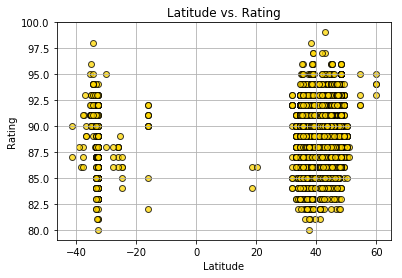

In [15]:
plt.scatter(dropped_wine['latitude'],dropped_wine['points'],marker='o', facecolors='gold',edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Rating")
plt.title("Latitude vs. Rating")
plt.grid()
plt.savefig("../data/output_data/Latitude-Rating.png")


In [16]:
dropped_wine.corr(method='pearson')
#Ho: Wine ratings is impacted by the price and location of the wine
#Ha: Wine ratings is not impacted by the price and location of the wine 
#This means that the price and location has low significance to the wines rating; therefore we should accept the alternative hypothesis
#and reject the null hypothesis

Unnamed: 0    points     price  latitude  longitude
Unnamed: 0    1.000000 -0.082478 -0.020908 -0.009663   0.079148
points       -0.082478  1.000000  0.476271  0.100334   0.003465
price        -0.020908  0.476271  1.000000  0.033223   0.004225
latitude     -0.009663  0.100334  0.033223  1.000000  -0.188426
longitude     0.079148  0.003465  0.004225 -0.188426   1.000000

In [17]:
#95-100 Classic: a great wine
#90-94 Outstanding: a wine of superior character and style
#85-89 Very good: a wine with special qualities
#80-84 Good: a solid, well-made wine

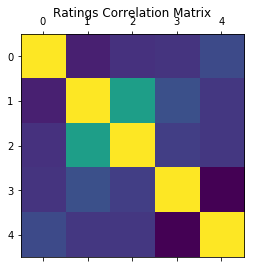

<Figure size 432x288 with 0 Axes>

In [18]:
plt.matshow(dropped_wine.corr())
plt.title("Ratings Correlation Matrix")
plt.show()
plt.savefig("../data/output_data/CorrelationMatrix.png")

In [19]:
# Create the bins in which Data will be held
bins= [80, 85, 90, 95, 100]

# Create the names for the four bins
group_labels = ["Good", "Very Good", "Outstanding", "Classic"]

In [20]:
dropped_wine['points'] = pd.cut(dropped_wine['points'], bins, labels=group_labels)
dropped_wine

Unnamed: 0 country                                        description  \
0               0      US  This tremendous 100% varietal wine hails from ...   
1               1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2               2      US  Mac Watson honors the memory of a wine once ma...   
3               3      US  This spent 20 months in 30% new French oak, an...   
4               4  France  This is the top wine from La Bégude, named aft...   
5               5   Spain  Deep, dense and pure from the opening bell, th...   
6               6   Spain  Slightly gritty black-fruit aromas include a s...   
7               7   Spain  Lush cedary black-fruit aromas are luxe and of...   
8               8      US  This re-named vineyard was formerly bottled as...   
9               9      US  The producer sources from two blocks of the vi...   
10             10   Italy  Elegance, complexity and structure come togeth...   
11             11      US  From 18-year-old vines, this supple well-balan...   
12             12      US  A standout even in this terrific lineup of 201...   
13             13  France  This wine is in peak condition. The tannins an...   
14             14      US  With its sophisticated mix of mineral, acid an...   
15             15      US  First made in 2006, this succulent luscious Ch...   
16             16      US  This blockbuster, powerhouse of a wine suggest...   
17             17   Spain  Nicely oaked blackberry, licorice, vanilla and...   
18             18  France  Coming from a seven-acre vineyard named after ...   
19             19      US  This fresh and lively medium-bodied wine is be...   
20             20      US  Heitz has made this stellar rosé from the rare...   
21             21   Spain  Alluring, complex and powerful aromas of grill...   
22             22   Spain  Tarry blackberry and cheesy oak aromas are app...   
23             23      US  The apogee of this ambitious winery's white wi...   
24             24      US  San Jose-based producer Adam Comartin heads 1,...   
25             26      US  Bergström has made a Shea designate since 2003...   
26             27      US  Focused and dense, this intense wine captures ...   
27             28      US  Cranberry, baked rhubarb, anise and crushed sl...   
28             29      US  This standout Rocks District wine brings earth...   
29             31      US  Steely and perfumed, this wine sees only 20% n...   
...           ...     ...                                                ...   
77254      150807      US  Ripe, tropical fruit aromas mark this spicy, w...   
77255      150812      US  Ripe, muscular wine, with a full throttle nose...   
77256      150827      US  Opens with blackberries and spices; fruity, fo...   
77257      150831      US  A rich, creamy wine, loaded with personality. ...   
77258      150836      US  With this wine, Callaway takes a step away fro...   
77259      150856      US  White Merlot? Why not? It's actually a deep ro...   
77260      150861      US  From a dependable producer and a fine vintage ...   
77261      150873      US  With a color akin to the soft pink of ripe pea...   
77262      150883      US  A coppery colored, off-dry-to-frankly-sweet wi...   
77263      150889      US  A bizarre style of wine. The aromas are Port-l...   
77264      150892      US  A light, earthy wine, with violet, berry and t...   
77265      150906  France  This lovely wine, a Monopole, is already showi...   
77266      150907  France  Rion holds back on the new oak, letting the pu...   
77267      150908  France  Another premier cru from Michel Gros, this one...   
77268      150909  France  This is a lovely, fragrant Burgundy, with a sm...   
77269      150911  France  This needs a good bit of breathing time, then ...   
77270      150912  France  The nose is dominated by the attractive scents...   
77271      150914      US  Old-gold in color, and thick and syrupy. The a...   
77272  

In [21]:
rating_groups = dropped_wine.groupby('points')
rating_groups['country'].count()

points
Good           15677
Very Good      41533
Outstanding    18854
Classic          785
Name: country, dtype: int64

In [22]:
rating_groups['variety','country','region_1'].describe()

variety                          country                    \
              count unique         top  freq   count unique top   freq   
points                                                                   
Good          15677    277  Chardonnay  1492   15677      7  US   8618   
Very Good     41533    356  Pinot Noir  4269   41533      7  US  19992   
Outstanding   18854    214  Pinot Noir  3318   18854      7  US  10768   
Classic         785     45  Pinot Noir   157     785      6  US    456   

            region_1                                     
               count unique                   top  freq  
points                                                   
Good           15677    661            California   920  
Very Good      41533    946  Columbia Valley (WA)  1800  
Outstanding    18854    543           Napa Valley  1252  
Classic          785     90  Russian River Valley    73

In [23]:
rtg=rating_groups['price'].describe()
rtg

count        mean         std   min   25%    50%    75%     max
points                                                                        
Good         15677.0   21.714295   14.102904   4.0  13.0   18.0   27.0   225.0
Very Good    41533.0   31.441769   21.360058   6.0  18.0   25.0   40.0   535.0
Outstanding  18854.0   60.022117   45.675469   8.0  35.0   50.0   70.0  2013.0
Classic        785.0  150.475159  141.996873  28.0  70.0  100.0  175.0  1400.0

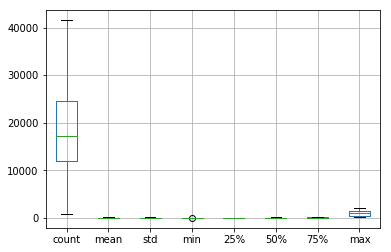

In [24]:
rtg.boxplot()
#create a box plot here

In [25]:

dropped_wine['price'] = pd.cut(dropped_wine['price'], bins, labels=group_labels)
dropped_wine

Unnamed: 0 country                                        description  \
0               0      US  This tremendous 100% varietal wine hails from ...   
1               1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2               2      US  Mac Watson honors the memory of a wine once ma...   
3               3      US  This spent 20 months in 30% new French oak, an...   
4               4  France  This is the top wine from La Bégude, named aft...   
5               5   Spain  Deep, dense and pure from the opening bell, th...   
6               6   Spain  Slightly gritty black-fruit aromas include a s...   
7               7   Spain  Lush cedary black-fruit aromas are luxe and of...   
8               8      US  This re-named vineyard was formerly bottled as...   
9               9      US  The producer sources from two blocks of the vi...   
10             10   Italy  Elegance, complexity and structure come togeth...   
11             11      US  From 18-year-old vines, this supple well-balan...   
12             12      US  A standout even in this terrific lineup of 201...   
13             13  France  This wine is in peak condition. The tannins an...   
14             14      US  With its sophisticated mix of mineral, acid an...   
15             15      US  First made in 2006, this succulent luscious Ch...   
16             16      US  This blockbuster, powerhouse of a wine suggest...   
17             17   Spain  Nicely oaked blackberry, licorice, vanilla and...   
18             18  France  Coming from a seven-acre vineyard named after ...   
19             19      US  This fresh and lively medium-bodied wine is be...   
20             20      US  Heitz has made this stellar rosé from the rare...   
21             21   Spain  Alluring, complex and powerful aromas of grill...   
22             22   Spain  Tarry blackberry and cheesy oak aromas are app...   
23             23      US  The apogee of this ambitious winery's white wi...   
24             24      US  San Jose-based producer Adam Comartin heads 1,...   
25             26      US  Bergström has made a Shea designate since 2003...   
26             27      US  Focused and dense, this intense wine captures ...   
27             28      US  Cranberry, baked rhubarb, anise and crushed sl...   
28             29      US  This standout Rocks District wine brings earth...   
29             31      US  Steely and perfumed, this wine sees only 20% n...   
...           ...     ...                                                ...   
77254      150807      US  Ripe, tropical fruit aromas mark this spicy, w...   
77255      150812      US  Ripe, muscular wine, with a full throttle nose...   
77256      150827      US  Opens with blackberries and spices; fruity, fo...   
77257      150831      US  A rich, creamy wine, loaded with personality. ...   
77258      150836      US  With this wine, Callaway takes a step away fro...   
77259      150856      US  White Merlot? Why not? It's actually a deep ro...   
77260      150861      US  From a dependable producer and a fine vintage ...   
77261      150873      US  With a color akin to the soft pink of ripe pea...   
77262      150883      US  A coppery colored, off-dry-to-frankly-sweet wi...   
77263      150889      US  A bizarre style of wine. The aromas are Port-l...   
77264      150892      US  A light, earthy wine, with violet, berry and t...   
77265      150906  France  This lovely wine, a Monopole, is already showi...   
77266      150907  France  Rion holds back on the new oak, letting the pu...   
77267      150908  France  Another premier cru from Michel Gros, this one...   
77268      150909  France  This is a lovely, fragrant Burgundy, with a sm...   
77269      150911  France  This needs a good bit of breathing time, then ...   
77270      150912  France  The nose is dominated by the attractive scents...   
77271      150914      US  Old-gold in color, and thick and syrupy. The a...   
77272  

In [26]:
price = dropped_wine.groupby('price')

In [27]:
#Focussing just US Data, simply because historical data of climate 
#(Annual precipitation, rainfall, soil characteristics are not available for free for the rest of the world )
us_data=dropped_wine[dropped_wine["country"]=="US"]
us_data

Unnamed: 0 country                                        description  \
0               0      US  This tremendous 100% varietal wine hails from ...   
2               2      US  Mac Watson honors the memory of a wine once ma...   
3               3      US  This spent 20 months in 30% new French oak, an...   
8               8      US  This re-named vineyard was formerly bottled as...   
9               9      US  The producer sources from two blocks of the vi...   
11             11      US  From 18-year-old vines, this supple well-balan...   
12             12      US  A standout even in this terrific lineup of 201...   
14             14      US  With its sophisticated mix of mineral, acid an...   
15             15      US  First made in 2006, this succulent luscious Ch...   
16             16      US  This blockbuster, powerhouse of a wine suggest...   
19             19      US  This fresh and lively medium-bodied wine is be...   
20             20      US  Heitz has made this stellar rosé from the rare...   
23             23      US  The apogee of this ambitious winery's white wi...   
24             24      US  San Jose-based producer Adam Comartin heads 1,...   
25             26      US  Bergström has made a Shea designate since 2003...   
26             27      US  Focused and dense, this intense wine captures ...   
27             28      US  Cranberry, baked rhubarb, anise and crushed sl...   
28             29      US  This standout Rocks District wine brings earth...   
29             31      US  Steely and perfumed, this wine sees only 20% n...   
31             34      US  The aromas entice with notes of wet stone, hon...   
40             47      US  Blended with 9% Malbec, 9% Cabernet Franc and ...   
44             55      US  A blend of Cabernet from Grand Ciel (31%), Cie...   
45             57      US  While exuberantly fruity, almost tropical on t...   
46             58      US  Cabernet makes up just over half of this blend...   
51             65      US  Fresh boysenberries and a blueberry sorbet cha...   
53             67      US  From the producer's monumental Atlas Peak vine...   
54             68      US  Big, bold, dark and chewy, this builds upon su...   
55             69      US  A juiciness of cherry and vanilla spark the op...   
56             70      US  Sweetened tannins highlight a depth of chocola...   
57             75      US  An elegant blend from different estate vineyar...   
...           ...     ...                                                ...   
77229      150751      US  Plummy, ripe, beginning to oxidize. Ready to d...   
77231      150753      US  Simple and fruity and forward, though still un...   
77232      150755      US  Dark, brick colored wine, heavily oxidized, wi...   
77234      150757      US  Full blueberry and blackberry aromas can't ove...   
77235      150758      US  The more I taste Vidal, the more I find it an ...   
77236      150762      US  This wine is still young and precocious, but d...   
77237      150764      US  Specially selected lots account for this top-o...   
77239      150769      US  Dark, oaky, and fine in every respect. Sonoma ...   
77240      150774      US  A very distinctive Chard—full of character and...   
77244      150787      US  This wine become pretty pricey but that's beca...   
77245      150788      US  This Chard has always been dependably rich, an...   
77246      150790      US  Always a bit herbaceous, this year the underly...   
77247      150792      US  Strong , complex aromas, with notes of tropica...   
77248      150794      US  Spicy black fruit, with bell pepper, black pep...   
77249      150796      US  Made largely of Cabernet Franc, this wine has ...   
77252      150803      US  Here's a wine with great bones: nicely structu...   
77254      150807      US  Ripe, tropical fruit aromas mark this spicy, w...   
77255      150812      US  Ripe, muscular wine, with a full throttle nose...   
77256  

In [28]:
price['country'].value_counts()

price        country  
Good         US           323
             Italy        143
             France       113
             Australia     30
             Spain         12
             Canada         4
             Argentina      2
Very Good    US           248
             Italy        215
             France       141
             Spain         33
             Argentina     28
             Australia     24
Outstanding  US           148
             Italy         91
             France        83
             Spain         21
             Australia     12
             Argentina      4
             Canada         2
Classic      US           295
             Italy        138
             France       117
             Australia     51
             Spain         37
             Argentina     12
             Canada         1
Name: country, dtype: int64

In [29]:
# Setting target area as the combination of province and region_1 for identifying locations
target_area = (us_data["region_1"]+","+us_data["province"])

In [30]:
price["latitude","longitude"].mean()

latitude  longitude
price                            
Good         38.158514 -78.501719
Very Good    38.760816 -45.654274
Outstanding  37.521538 -65.172755
Classic      37.093206 -39.815724

In [31]:
prd = price.describe()
prd

Unnamed: 0                                                       \
                 count          mean           std    min      25%      50%   
price                                                                         
Good             627.0  70218.805423  43155.186372   67.0  30539.0  69866.0   
Very Good        689.0  71310.165457  45580.400277    2.0  27188.0  74431.0   
Outstanding      361.0  74531.592798  44583.843902  123.0  33222.0  77693.0   
Classic          651.0  74717.193548  45276.767923   50.0  32279.5  77937.0   

                                latitude                ...                 \
                  75%       max    count       mean     ...            75%   
price                                                   ...                  
Good         106433.0  150727.0     38.0  38.158514     ...      45.277904   
Very Good    111990.0  150570.0     44.0  38.760816     ...      43.962772   
Outstanding  114544.0  149571.0     20.0  37.521538     ...      44.781533   
Classic      116574.5  150762.0     36.0  37.093206     ...      45.714936   

                       longitude                                    \
                   max     count       mean        std         min   
price                                                                
Good         48.318179      38.0 -78.501719  69.071006 -123.479454   
Very Good    48.318179      44.0 -45.654274  70.126404 -123.053708   
Outstanding  47.026030      20.0 -65.172755  77.598365 -123.096764   
Classic      59.939832      36.0 -39.815724  69.763911 -123.198716   

                                                            
                    25%         50%        75%         max  
price                                                       
Good        -123.032628 -122.265389   2.649391  138.610000  
Very Good   -122.423574   -0.993127  11.490093  138.950000  
Outstanding -122.265389 -122.265389   4.739357  139.038277  
Classic     -122.265389    4.835643   8.453741  140.935111  

[4 rows x 24 columns]

In [32]:
# We are looking at the relationship between price and ratings (points)
#Clean Dataframe with only country, designation, points, price, province, and winery
wine2_df=wine_df.drop(columns= ["Unnamed: 0","description","region_1","region_2"], axis=1)
wine2_df.head()

country                           designation  points  price  \
0      US                     Martha's Vineyard      96  235.0   
1   Spain  Carodorum Selección Especial Reserva      96  110.0   
2      US         Special Selected Late Harvest      96   90.0   
3      US                               Reserve      96   65.0   
4  France                            La Brûlade      95   66.0   

         province             variety                   winery  
0      California  Cabernet Sauvignon                    Heitz  
1  Northern Spain       Tinta de Toro  Bodega Carmen Rodríguez  
2      California     Sauvignon Blanc                 Macauley  
3          Oregon          Pinot Noir                    Ponzi  
4        Provence  Provence red blend     Domaine de la Bégude

In [33]:
#Removed wines missing data
wine3_df=wine2_df.dropna()
# wine3_df.count() 
wine3_df


country                           designation  points  price  \
0                US                     Martha's Vineyard      96  235.0   
1             Spain  Carodorum Selección Especial Reserva      96  110.0   
2                US         Special Selected Late Harvest      96   90.0   
3                US                               Reserve      96   65.0   
4            France                            La Brûlade      95   66.0   
5             Spain                             Numanthia      95   73.0   
6             Spain                             San Román      95   65.0   
7             Spain               Carodorum Único Crianza      95  110.0   
8                US                                Silice      95   65.0   
9                US                  Gap's Crown Vineyard      95   60.0   
10            Italy                    Ronco della Chiesa      95   80.0   
11               US       Estate Vineyard Wadensvil Block      95   48.0   
12               US                        Weber Vineyard      95   48.0   
13           France               Château Montus Prestige      95   90.0   
14               US                        Grace Vineyard      95  185.0   
15               US                                Sigrid      95   90.0   
16               US                       Rainin Vineyard      95  325.0   
17            Spain                6 Años Reserva Premium      95   80.0   
18           France                         Le Pigeonnier      95  290.0   
19               US                  Gap's Crown Vineyard      95   75.0   
20               US                            Grignolino      95   24.0   
21            Spain               Prado Enea Gran Reserva      95   79.0   
22            Spain                            Termanthia      95  220.0   
23               US                         Giallo Solare      95   60.0   
24               US                         R-Bar-R Ranch      95   45.0   
25      New Zealand                       Maté's Vineyard      94   57.0   
26               US                         Shea Vineyard      94   62.0   
27               US                               Abetina      94  105.0   
28               US                       Garys' Vineyard      94   60.0   
29               US                       The Funk Estate      94   60.0   
...             ...                                   ...     ...    ...   
150889           US                       Lafond Vineyard      82   35.0   
150890        Chile                               Reserva      82   12.0   
150892           US                               Coastal      82   10.0   
150894        Chile                          Doña Isidora      82   14.0   
150897        Chile                               Reserva      82   12.0   
150899        Chile          Medalla Real Special Reserve      82   15.0   
150900        Chile                         Prima Reserva      81   13.0   
150901        Chile                               Reserva      81   12.0   
150902        Chile                        Estate Bottled      81   10.0   
150903        Chile                                   120      81    7.0   
150905        Chile                         Prima Reserva      80   13.0   
150906       France                         Clos des Reas      93   65.0   
150907       France                       Les Beaux-Monts      92   52.0   
150908       France                           Aux Brulees      90   65.0   
150909       France                  Clos dea Argillieres      89   52.0   
150911       France                          Les Chaliots      87   37.0   
150912       France                           Les Charmes      87   65.0   
150914           US           Late Harvest Cluster Select      94   25.0   
150915           US                           Nightingale      93   30.0   
150916           US                             J. Schram      93   65.0   
150917       France                         Brut Mosaïque   

In [34]:
#Create a dataframe with just the features I need (province, winery, points, price)
wine4_df = wine3_df[['province',"winery",'points','price']]#.groupby(['province'],as_index=False) 
# # type(wine4_df) 
wine4_df
# wine4_df["price"].max()

province                   winery  points  price
0               California                    Heitz      96  235.0
1           Northern Spain  Bodega Carmen Rodríguez      96  110.0
2               California                 Macauley      96   90.0
3                   Oregon                    Ponzi      96   65.0
4                 Provence     Domaine de la Bégude      95   66.0
5           Northern Spain                Numanthia      95   73.0
6           Northern Spain                 Maurodos      95   65.0
7           Northern Spain  Bodega Carmen Rodríguez      95  110.0
8                   Oregon                Bergström      95   65.0
9               California                Blue Farm      95   60.0
10      Northeastern Italy         Borgo del Tiglio      95   80.0
11                  Oregon   Patricia Green Cellars      95   48.0
12                  Oregon   Patricia Green Cellars      95   48.0
13        Southwest France        Vignobles Brumont      95   90.0
14                  Oregon           Domaine Serene      95  185.0
15                  Oregon                Bergström      95   90.0
16              California                     Hall      95  325.0
17          Northern Spain                 Valduero      95   80.0
18        Southwest France       Château Lagrézette      95  290.0
19              California             Gary Farrell      95   75.0
20              California                    Heitz      95   24.0
21          Northern Spain                     Muga      95   79.0
22          Northern Spain                Numanthia      95  220.0
23              California         Center of Effort      95   60.0
24              California                 Comartin      95   45.0
25                   Kumeu              Kumeu River      94   57.0
26                  Oregon                Bergström      94   62.0
27                  Oregon                    Ponzi      94  105.0
28              California                     Roar      94   60.0
29              Washington                   Saviah      94   60.0
...                    ...                      ...     ...    ...
150889          California                   Lafond      82   35.0
150890        Maipo Valley                Undurraga      82   12.0
150892          California                 Callaway      82   10.0
150894        Maipo Valley            Cousiño-Macul      82   14.0
150897        Maipo Valley                Undurraga      82   12.0
150899        Maipo Valley               Santa Rita      82   15.0
150900        Maipo Valley               De Martino      81   13.0
150901        Maipo Valley                Undurraga      81   12.0
150902        Maipo Valley               De Martino      81   10.0
150903        Rapel Valley               Santa Rita      81    7.0
150905        Maipo Valley               De Martino      80   13.0
150906            Burgundy              Michel Gros      93   65.0
150907            Burgundy              Daniel Rion      92   52.0
150908            Burgundy              Michel Gros      90   65.0
150909            Burgundy              Daniel Rion      89   52.0
150911            Burgundy              Michel Gros      87   37.0
150912            Burgundy              Daniel Rion      87   65.0
150914          California                  Navarro      94   25.0
150915          California                 Beringer      93   30.0
150916          California              Schramsberg      93   65.0
150917           Champagne                 Jacquart      92   30.0
150918           Champagne                 Jacquart      92   38.0
150919           Champagne                H.Germain      91   37.0
150920  Northeastern Italy                  Letrari      91   19.0
150921           Champagne                 Jacquart      91   38.0
150923           Champagne                 Jacquart      91   30.0
150924           Champagne  Heidsieck & Co Monopole      91   70.0
150926           Champagne                H.Germain      91   27.

In [35]:
#met mean of wine4 
# wine5_df = wine4_df[['province',"winery",'points','price']] 
wine5_gr=wine4_df.groupby("province")
wine6_gr=wine5_gr.mean()
# wine6_gr
wine6_gr["price"].max()

96.25

In [36]:
# wine_winery_df=wine4_df["winery"]
# wine_winery_df.count()
# wine4_Pro_Points=wine4_df["province","points"].mean()
# wine_Pro_Points
# wine4_Pro_Price=wine4_df["province","price"].mean()
# wine4_Pro_Price

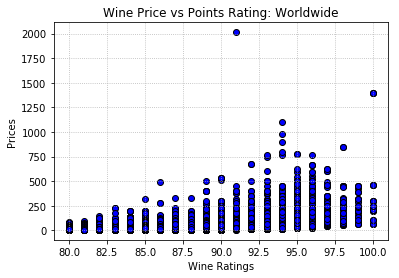

In [37]:
#Create scatter plot of entire data frame. 
plt.scatter(wine3_df["points"],wine3_df["price"],Facecolors="blue", edgecolors="black")
plt.title("Wine Price vs Points Rating: Worldwide")
plt.xlabel("Wine Ratings")
plt.ylabel("Prices")
plt.grid(linestyle="dotted")
plt.savefig("../data/output_data/Price_Rating.png",dpi=200)

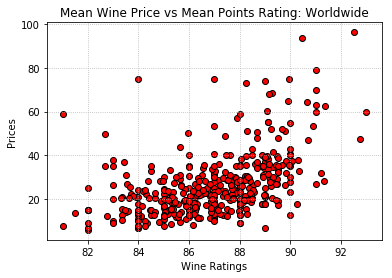

In [38]:
#Create scatter plot of the data frame sorted by province means. 
plt.scatter(wine6_gr["points"],wine6_gr["price"],Facecolors="red", edgecolors="black")
 # Create a title, x label, and y label for our chart
plt.title("Mean Wine Price vs Mean Points Rating: Worldwide")
plt.xlabel("Wine Ratings")
plt.ylabel("Prices")
plt.grid(linestyle="dotted")
plt.savefig("../data/output_data/Mean_Price_Rating.png",dpi=200)


In [39]:
# get total count of wines in each point category
wine_df["points"].value_counts()

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64

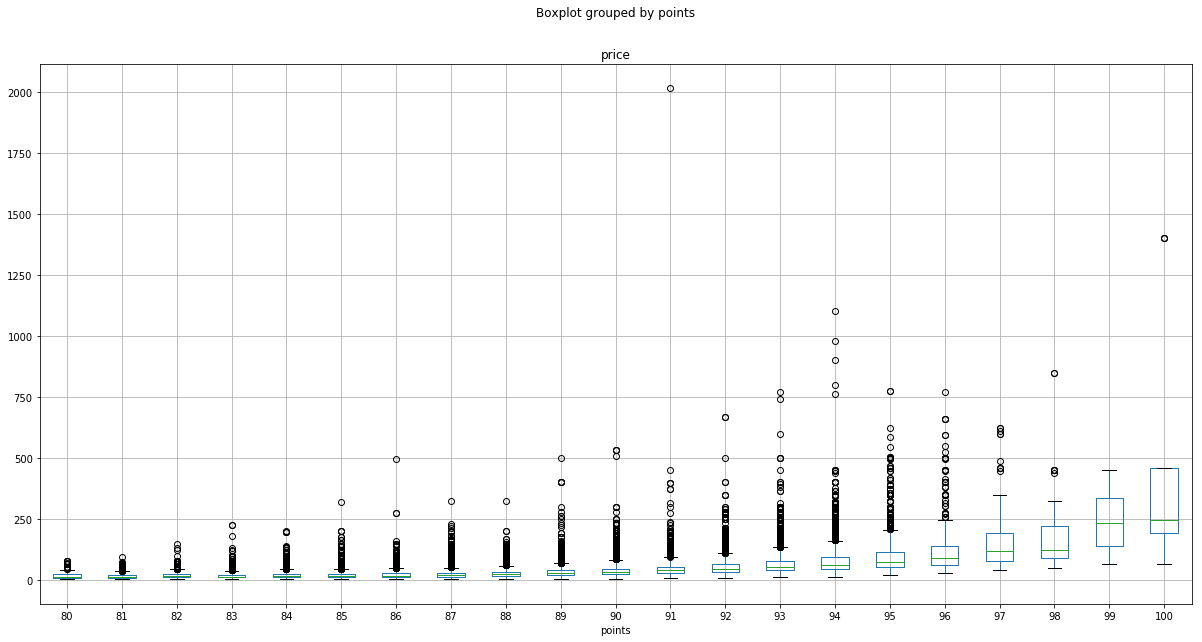

In [40]:
# Create a boxplot to compare price and points
wine3_df.boxplot("price", by="points", figsize=(20, 10),showfliers=(True))

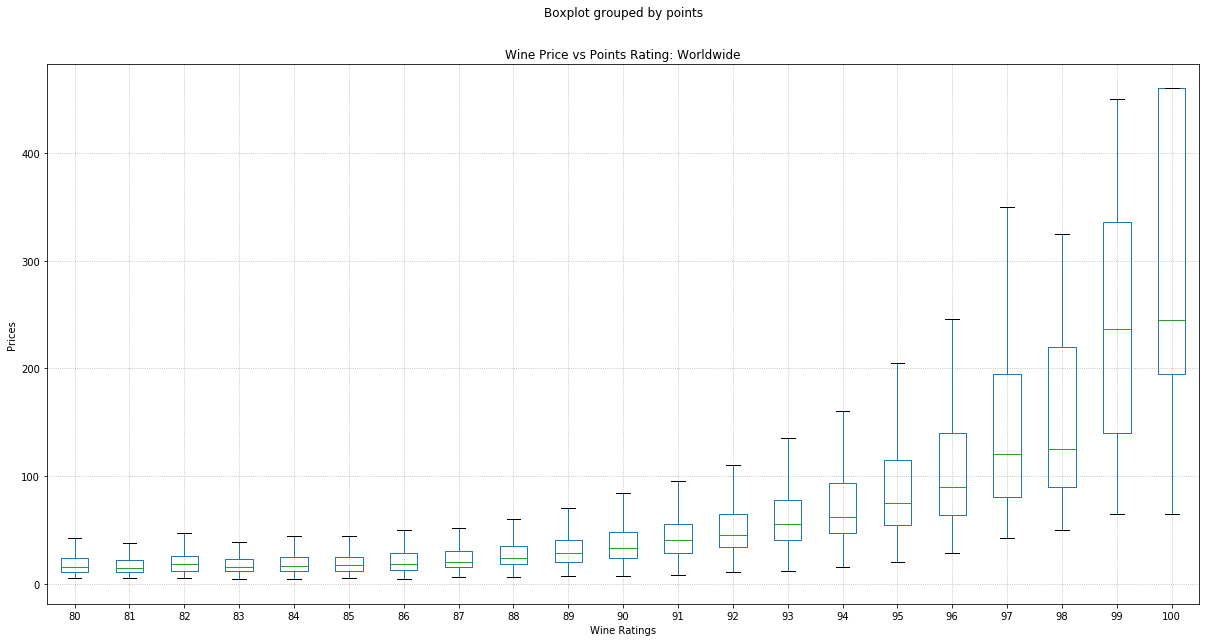

In [41]:
# Create a boxplot to compare price and points
wine3_df.boxplot("price", by="points", figsize=(20, 10),showfliers=(False))
plt.title("Wine Price vs Points Rating: Worldwide")
plt.xlabel("Wine Ratings")
plt.ylabel("Prices")
plt.grid(linestyle="dotted")
plt.savefig("../data/output_data/BoxPlot_Price_Rating.png",dpi=200)

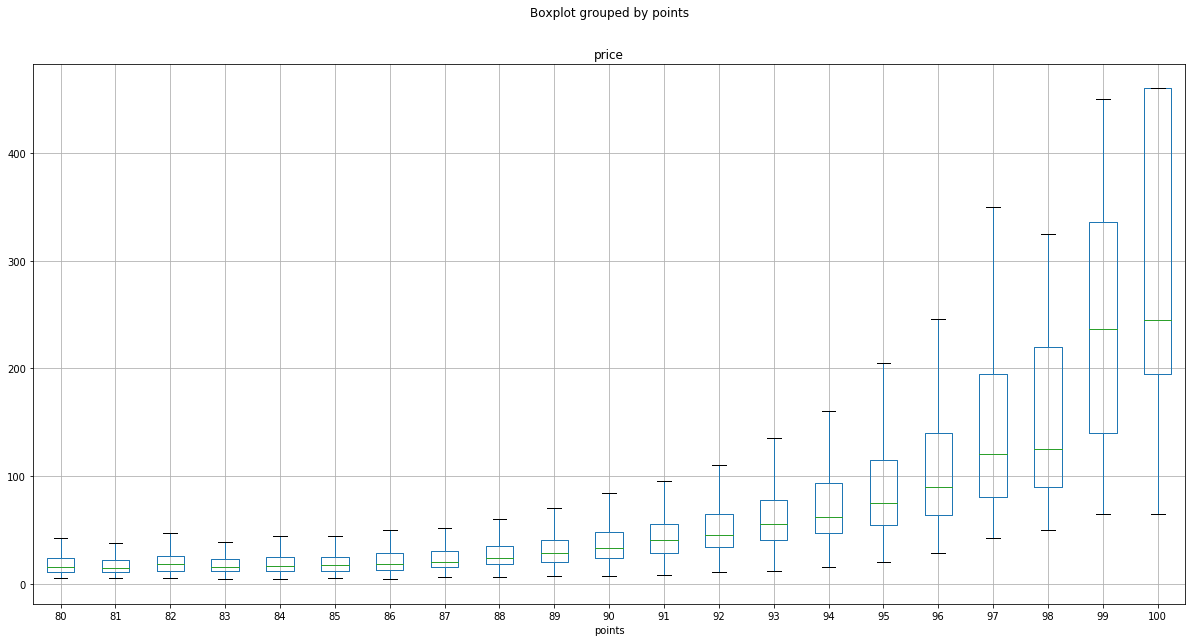

In [42]:
# Create a boxplot to compare price and points
wine3_df.boxplot("price", by="points", figsize=(20, 10),showfliers=(False))

In [43]:
# Perform the ANOVA 
# stats.f_oneway(group1, group2, group3, group4)

In [44]:
#prices sorted by country in ascending order 
Wine_PPP_df = wine_df[['country','points','price']].groupby(['country'],as_index=False)
Wine_PPP_df.mean().sort_values(by=["points","price"],ascending=True)

country     points      price
39             South Korea  81.500000  13.500000
30              Montenegro  82.000000  10.000000
9                    China  82.000000  20.333333
5                   Brazil  83.240000  19.920000
36                Slovakia  83.666667  15.333333
13                   Egypt  83.666667        NaN
25               Lithuania  84.250000  10.000000
47                 Uruguay  84.478261  25.847059
46                 Ukraine  84.600000  13.000000
29                 Moldova  84.718310  15.366197
4   Bosnia and Herzegovina  84.750000  12.750000
28                  Mexico  84.761905  29.095238
27               Macedonia  84.812500  15.312500
34                 Romania  84.920863  16.395683
23                   Japan  85.000000  24.000000
6                 Bulgaria  85.467532  11.545455
16                 Georgia  85.511628  18.581395
24                 Lebanon  85.702703  25.432432
12          Czech Republic  85.833333  18.000000
11                  Cyprus  85.870968  15.483871
1                Argentina  85.996093  20.794881
42                 Tunisia  86.000000        NaN
18                  Greece  86.117647  21.747706
10                 Croatia  86.280899  23.108434
8                    Chile  86.296768  19.344780
40                   Spain  86.646589  27.048529
26              Luxembourg  87.000000  40.666667
21                  Israel  87.176190  31.304918
38            South Africa  87.225421  21.130532
41             Switzerland  87.250000  26.500000
19                 Hungary  87.329004  44.204348
32             New Zealand  87.554217  24.173290
20                   India  87.625000  13.875000
35                  Serbia  87.714286  24.285714
44                      US  87.818789  33.653808
2                Australia  87.892475  31.258480
0                  Albania  88.000000  20.000000
45               US-France  88.000000  50.000000
33                Portugal  88.057685  26.332615
43                  Turkey  88.096154  25.800000
31                 Morocco  88.166667  18.833333
37                Slovenia  88.234043  28.061728
7                   Canada  88.239796  34.628866
22                   Italy  88.413664  37.547913
17                 Germany  88.626427  39.011078
15                  France  88.925870  45.619885
3                  Austria  89.276742  31.192106
14                 England  92.888889  47.500000

In [45]:
#prices sorted by province in ascending order 
Wine_PPPro_df = wine_df[['province','points','price']].groupby(['province'],as_index=False)
Wine_PPPro_df.mean().sort_values(by=["points","price"],ascending=True)

province     points      price
192                         Lemesos  80.000000  10.000000
246             Murfatlar Cernavoda  80.000000  15.000000
372                      Table wine  81.000000   8.000000
75                  Chisinau County  81.000000   9.000000
166                    Itata Valley  81.000000  15.000000
21                        Atlantida  81.000000  48.750000
168                     Jiri Valley  81.500000  13.500000
33                       Beni M'Tir  82.000000   6.000000
78                     Codru Region  82.000000   9.000000
186              Lake Skadar Valley  82.000000  10.000000
116                  Egilias Slopes  82.000000  12.000000
345                Serra do Sudeste  82.000000  15.000000
407                   Vale Trentino  82.000000  15.000000
451                           Zitsa  82.000000  15.000000
74                            China  82.000000  20.333333
175                        Kentucky  82.250000  30.750000
226       Middle and South Dalmatia  82.666667  50.000000
408               Vale dos Vinhedos  82.818182  16.454545
115                            Eger  82.833333  15.166667
193                          Lemnos  83.000000  10.000000
67        Central Otago-Marlborough  83.000000  17.000000
366                        Stirling  83.000000  20.000000
83                          Colonia  83.000000  26.500000
387                          Ticino  83.000000  38.000000
50                            Cahul  83.062500  11.125000
225                        Michigan  83.160000  22.000000
38                           Brazil  83.333333  20.833333
263                      New Jersey  83.416667  19.541667
430                      Vânju Mare  83.437500  36.875000
161                            Iowa  83.500000  13.750000
..                              ...        ...        ...
389                           Tokaj  89.689655  48.535714
390                          Tokaji  89.915493  73.154930
215                       Marchigue  89.916667  25.416667
211   Maipo Valley-Colchagua Valley  90.000000  13.000000
259                       Neuchâtel  90.000000  21.000000
190                         Lebanon  90.000000  23.333333
406                          Valais  90.000000  28.000000
212                          Malgas  90.000000  35.000000
152                  Hemel en Aarde  90.000000  36.692308
104                          Dingač  90.000000  38.000000
392                         Tradouw  90.000000  40.000000
448          Wiener Gemischter Satz  90.200000  26.500000
143                   Golan Heights  90.200000  44.000000
173                         Kamptal  90.406728  36.468504
72                        Champagne  90.638686  93.412305
44                             Buin  90.666667  64.333333
431                          Wachau  90.765013  47.132308
393                      Traisental  90.791667  31.888889
191                      Leithaberg  90.833333  32.600000
309                        Portugal  90.888889  53.666667
237             Moscatel de Setúbal  91.000000  16.400000
317  Rapel Valley-Casablanca Valley  91.000000  70.000000
79                          Colares  91.000000  79.000000
119                       Eisenberg  91.333333  24.666667
426                   Vinho da Mesa  91.333333  28.333333
314                     Puente Alto  91.636364  65.181818
439                  Waitaki Valley  92.000000        NaN
341                      Santa Cruz  92.500000  96.250000
126                         England  92.888889  47.500000
219           Martinborough Terrace  93.000000  60.000000

[455 rows x 3 columns]

In [46]:
# We are reporting the Climate conditions, Soil properties of  Wine-producing areas in USA.
# Current conditions cannot be representative of the Climate of those areas. We need annual values (temperature,
# rainfall, soil properties) to characterize these areas. The historical weather and soil data even though 
#available are costly.And most of the websites do not fucntion well. USDA, Soil Grids had broken API-s.
# So we had to access public data (PNAS, Agromonitoring.com) which are relatively easier to find without any cost.
# Locations of these climate, soil data are different from the Wine-producing areas. So we had to lookout for the
# nearest station or the polygon that  represents the conditions for the Wine-producing location. Details are provided
# within the comment blocks in the notebook.

In [47]:
dropped_wine= wine_df2.dropna()
dropped_wine.count()

country        77284
description    77284
designation    77284
points         77284
price          77284
province       77284
region_1       77284
variety        77284
winery         77284
dtype: int64

In [48]:
#Focussing just in US Data, simply because historical data of climate 
#(Annual precipitation, rainfall, soil characteristics are not available for free for the rest of the world )
us_data=dropped_wine[dropped_wine["country"]=="US"]
us_data

country                                        description  \
0           US  This tremendous 100% varietal wine hails from ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
8           US  This re-named vineyard was formerly bottled as...   
9           US  The producer sources from two blocks of the vi...   
11          US  From 18-year-old vines, this supple well-balan...   
12          US  A standout even in this terrific lineup of 201...   
14          US  With its sophisticated mix of mineral, acid an...   
15          US  First made in 2006, this succulent luscious Ch...   
16          US  This blockbuster, powerhouse of a wine suggest...   
19          US  This fresh and lively medium-bodied wine is be...   
20          US  Heitz has made this stellar rosé from the rare...   
23          US  The apogee of this ambitious winery's white wi...   
24          US  San Jose-based producer Adam Comartin heads 1,...   
26          US  Bergström has made a Shea designate since 2003...   
27          US  Focused and dense, this intense wine captures ...   
28          US  Cranberry, baked rhubarb, anise and crushed sl...   
29          US  This standout Rocks District wine brings earth...   
31          US  Steely and perfumed, this wine sees only 20% n...   
34          US  The aromas entice with notes of wet stone, hon...   
47          US  Blended with 9% Malbec, 9% Cabernet Franc and ...   
55          US  A blend of Cabernet from Grand Ciel (31%), Cie...   
57          US  While exuberantly fruity, almost tropical on t...   
58          US  Cabernet makes up just over half of this blend...   
65          US  Fresh boysenberries and a blueberry sorbet cha...   
67          US  From the producer's monumental Atlas Peak vine...   
68          US  Big, bold, dark and chewy, this builds upon su...   
69          US  A juiciness of cherry and vanilla spark the op...   
70          US  Sweetened tannins highlight a depth of chocola...   
75          US  An elegant blend from different estate vineyar...   
...        ...                                                ...   
150751      US  Plummy, ripe, beginning to oxidize. Ready to d...   
150753      US  Simple and fruity and forward, though still un...   
150755      US  Dark, brick colored wine, heavily oxidized, wi...   
150757      US  Full blueberry and blackberry aromas can't ove...   
150758      US  The more I taste Vidal, the more I find it an ...   
150762      US  This wine is still young and precocious, but d...   
150764      US  Specially selected lots account for this top-o...   
150769      US  Dark, oaky, and fine in every respect. Sonoma ...   
150774      US  A very distinctive Chard—full of character and...   
150787      US  This wine become pretty pricey but that's beca...   
150788      US  This Chard has always been dependably rich, an...   
150790      US  Always a bit herbaceous, this year the underly...   
150792      US  Strong , complex aromas, with notes of tropica...   
150794      US  Spicy black fruit, with bell pepper, black pep...   
150796      US  Made largely of Cabernet Franc, this wine has ...   
150803      US  Here's a wine with great bones: nicely structu...   
150807      US  Ripe, tropical fruit aromas mark this spicy, w...   
150812      US  Ripe, muscular wine, with a full throttle nose...   
150827      US  Opens with blackberries and spices; fruity, fo...   
150831      US  A rich, creamy wine, loaded with personality. ...   
150836      US  With this wine, Callaway takes a step away fro...   
150856      US  White Merlot? Why not? It's actually a deep ro...   
150861      US  From a dependable producer and a fine vintage ...   
150873      US  With a color akin to the soft pink of ripe pea...   
150883      US  A coppery colored, off-dry-to-frankly-sweet wi...   
150889      US  A bizarre style of wine. The aromas are Port-l...   
15089

In [49]:
# Setting target area as the combination of province and region_1 for identifying locations
target_area = (us_data["region_1"]+","+us_data["province"])

In [50]:

unique_regions =us_data["region_1"].unique()
#unique_regions

In [51]:
# Gather the Wine Ratings data for US locations
ratings = us_data["points"]

In [52]:
# Creating a data frame for location and Wine Ratings
wv = pd.DataFrame({"Location": target_area,"Wine Ratings": ratings})
wv_group = wv.groupby("Location")
#Getting the mean ratings for a particular location
num_varieties = pd.DataFrame(wv_group["Wine Ratings"].mean()).reset_index()
#just sampling for testing purposes
#sample_num_varieties = num_varieties.sample(200)
sample_num_varieties = num_varieties
sample_num_varieties

Location  Wine Ratings
0                         Adelaida District,California     90.700000
1                            Albemarle County,Virginia     86.000000
2                          Alexander Valley,California     88.160920
3                                 Alta Mesa,California     87.181818
4                             Amador County,California     86.839117
5                               Amador-Napa,California     84.000000
6                             Ancient Lakes,Washington     86.875000
7                           Anderson Valley,California     90.149701
8    Anderson Valley-Sonoma County-Cole Ranch,Calif...     87.000000
9                              Applegate Valley,Oregon     86.870968
10                                     Arizona,Arizona     84.636364
11                     Arroyo Grande Valley,California     90.267380
12                              Arroyo Seco,California     87.824561
13                               Atlas Peak,California     88.225000
14                                    Augusta,Missouri     85.538462
15                           Ballard Canyon,California     90.909091
16                      Ben Lomond Mountain,California     86.722222
17                           Bennett Valley,California     89.642857
18                         Calaveras County,California     88.527027
19                               California,California     85.364839
20                        California-Oregon,California     84.000000
21                    California-Washington,California     89.000000
22                                Calistoga,California     89.100000
23                             Capay Valley,California     90.000000
24                            Carmel Valley,California     86.833333
25                                 Carneros,California     88.767857
26                     Carneros-Napa Valley,California     90.166667
27                                Cayuga Lake,New York     86.233333
28                            Central Coast,California     85.945493
29                           Central Valley,California     89.000000
..                                                 ...           ...
220                         Sta. Rita Hills,California     90.309412
221                     Stags Leap District,California     91.111111
222                       Stanislaus County,California     83.000000
223                           Suisun Valley,California     85.689655
224                          Swan Creek,North Carolina     84.250000
225                         Temecula Valley,California     86.491525
226                                Temecula,California     84.093750
227                  Templeton Gap District,California     88.250000
228                                        Texas,Texas     85.147059
229                 The Hamptons, Long Island,New York     86.391304
230                          Trinity County,California     82.875000
231                               Umpqua Valley,Oregon     87.678161
232                          Ventura County,California     88.000000
233                                    Vermont,Vermont     84.500000
234                  Virginia's Eastern Shore,Virginia     84.500000
235                                  Virginia,Virginia     85.104545
236                           Wahluke Slope,Washington     88.661972
237                     Walla Walla Valley (OR),Oregon     93.312500
238                 Walla Walla Valley (WA),Washington     90.142667
239                              Washington,Washington     88.250859
240          Western Connecticut Highlands,Connecticut     83.500000
241                           Willamette Valley,Oregon     88.843472
242                       Yadkin Valley,North Carolina     83.000000
243                           Yakima Valley,Washington     89.186548
244                              Yamhill County,Oregon     88.250000
245                    Yamhill-Carlton District,Oregon     89.623656
246                             Yolo County,

In [53]:
# create a params dict that will be updated with each location
params = {"key": gkey}
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# Loop through the locations and run a lat/long search for each location
for idx, row in sample_num_varieties.iterrows():
#    print(idx)
    sample_target = row["Location"]
    # update address key value
    params['address'] = f"{sample_target}"
    # make request
    location_lat_lng = requests.get(base_url, params=params)
    # convert to json
    location_lat_lng = location_lat_lng.json()
    lat_long_geo = location_lat_lng["results"][0]["geometry"]
    try:
        # Get the latitude and longitude of the place
        latitude = lat_long_geo["location"]["lat"]
        longitude = lat_long_geo["location"]["lng"]
        
        
        # ---Soil Properties (Moisture and Soil Temperature) from Agromonitoring.com (partner website of Openweathermap)----
        # Creating bounds for the location to construct a polygon needed to get access to the soil data. 
        #Could have used google geometry bounds but we have some locations as Oregon, Oregon or California, California
        # as region and province, which would have given bigger geometrical bounds than the actual winery.
        north = latitude  + 0.01
        south = latitude  - 0.01
        east =  longitude + 0.01
        west =  longitude - 0.01
        # Refer to documentation, why Agromonitoring return soil properties of a area demarcated by polygon instead 
        #of a latitude and longitude (https://agromonitoring.com/api/polygons). We have to construct a polygone given
        #by the geometrical bounds. 
        try:
            gp = GeoPolygon([[
                [east, north],
                [west, north],
                [west, south],
               [east, south],
                [east, north]]])
            # mgr is the wrapper for API call to Agromonitoring, creating a polygon
            polygon = mgr.create_polygon(gp, 'my new shiny polygon')
            try:
                # Getting soil properties via the polygon 
                soil = mgr.soil_data(polygon) 
                sample_num_varieties.loc[idx, "Lat"] = latitude
                sample_num_varieties.loc[idx, "Lng"] = longitude  
                sample_num_varieties.loc[idx, "Soil Temperature (C) at 10 cm depth"] = soil.ten_cm_temp(unit='celsius') 
                sample_num_varieties.loc[idx, "Soil Moisture"] = soil.moisture
            except(AssertionError):
                continue
        except( pyowm.exceptions.OWMError ):
            continue
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")
        continue
    time.sleep(3)
# Drop the missing values
sample_num_varieties = sample_num_varieties.dropna()

In [54]:
sample_num_varieties.count()

Location                               240
Wine Ratings                           240
Lat                                    240
Lng                                    240
Soil Temperature (C) at 10 cm depth    240
Soil Moisture                          240
dtype: int64

In [55]:
#Writing the data for Wine Ratings and soil data to csv format
sample_num_varieties.to_csv("Wine_Soil.csv")

In [56]:
# Creating a dataframe from the Wine Ratings and soil data
post_process = pd.read_csv("Wine_Soil.csv")               

In [57]:
# Accessing PNAS data for Annual Precipitation, Annual Average Temperature and pH of Soil in a given latitude and longitude
#Reference to the data :- Simkin et al. 2016 PNAS data on herbaceous species richness 
#and associated plot and covariate information 
#(https://catalog.data.gov/dataset/simkin-et-al-2016-pnas-data-on-herbaceous-species-richness-and-associated-plot-and-covaria)

pnas_df = pd.read_csv("../data/input_data/PNAS/PNAS.csv")
pnas_df.head(100)

latitude  longitude  spp_richness  N_dep_kghayr  precip_mm  temp_C_ave  \
0       46.1      -83.7            15          5.52     805.57        5.61   
1       46.1      -83.7            11          5.52     805.57        5.61   
2       46.1      -83.7            12          5.52     805.57        5.61   
3       46.1      -83.7            17          5.52     805.57        5.61   
4       46.1      -83.7            16          5.52     805.57        5.61   
5       46.1      -83.7            12          5.52     805.57        5.61   
6       45.7      -86.6            25          5.72     732.15        5.98   
7       45.3      -83.6            19          8.89     751.28        6.67   
8       46.0      -83.7            15          8.63     782.47        5.69   
9       46.1      -84.9            17          7.94     822.37        5.05   
10      46.0      -83.7            15          8.63     792.48        5.65   
11      45.9      -87.2            27          7.30     755.55        5.72   
12      46.1      -85.6            19          5.70     811.79        5.48   
13      46.0      -83.8            25          5.53     768.74        5.68   
14      44.1      -76.0            19         10.03     950.36        7.50   
15      44.1      -76.0            25         10.03     950.36        7.50   
16      44.1      -76.0            27         10.03     950.36        7.50   
17      44.1      -76.1            14         10.39     971.36        7.44   
18      44.1      -76.1            29         10.39     971.36        7.44   
19      44.1      -76.1            20         10.39     971.36        7.44   
20      44.1      -76.1            36         10.39     972.36        7.42   
21      44.1      -76.1            34         10.39     972.36        7.42   
22      44.1      -76.1             9         10.37     968.91        7.53   
23      44.1      -76.1            20         10.37     968.91        7.53   
24      44.1      -76.1            26         10.37     968.91        7.53   
25      44.1      -76.1            20         10.37     968.91        7.53   
26      44.1      -76.1            14         10.37     968.91        7.53   
27      44.1      -76.1            13         10.37     968.91        7.53   
28      44.1      -76.1            17         10.37     968.91        7.53   
29      44.1      -76.1            30         10.37     968.91        7.53   
..       ...        ...           ...           ...        ...         ...   
70      34.8      -79.1            38         11.82    1171.32       16.63   
71      34.1      -78.3            24         10.49    1381.23       17.01   
72      34.1      -78.3            45         10.49    1381.23       17.01   
73      34.0      -78.1             3         11.35    1451.60       17.26   
74      33.9      -78.2             9         11.26    1438.48       17.23   
75      34.7      -79.2            45         11.84    1170.35       16.61   
76      30.4      -83.2            61          8.26    1312.16       20.18   
77      35.2      -77.1             4         10.16    1326.52       17.09   
78      34.7      -77.3             4         10.44    1418.84       17.17   
79      34.7      -77.3            21         10.42    1419.98       17.15   
80      35.0      -77.0            10          9.99    1380.55       17.04   
81      34.6      -77.3            22         11.70    1410.66       17.28   
82      34.6      -77.7            22         10.75    1370.86       16.50   
83      34.0      -78.0             5         11.83    1465.80       17.29   
84      34.6      -77.7            27         10.75    1370.86       16.50   
85      34.8      -79.6             5         10.03    1146.69       16.51   
86      34.8      -79.6             8         10.03    1146.69       16.51   
87      34.1      -78.3            18         10.49    1381.23       17.01   
88      34.1      -78.3            54         10.49    1381.23       17.01   
89      34.0      -78.1   

In [58]:
pnas_group = pnas_df.groupby(["latitude","longitude"]).mean()
pnas_group = pnas_group.reset_index()

In [59]:
pnas_reduced = pnas_group[["latitude","longitude","precip_mm","temp_C_ave","pH"]]

In [60]:
# PNAS Data for latitude, and longitude
pnas_dat_lat = pnas_reduced["latitude"]
pnas_dat_lng = pnas_reduced["longitude"]
pnas_reduced

latitude  longitude    precip_mm  temp_C_ave        pH
0         27.3      -82.3  1470.280000   22.780000  4.600000
1         27.6      -81.3  1268.560000   22.500000  5.000000
2         27.6      -81.1  1307.155000   22.625000  4.450000
3         27.7      -81.3  1304.297500   22.392500  4.475000
4         27.7      -81.2  1324.100000   22.470000  4.300000
5         28.0      -81.1  1289.910000   22.280000  5.000000
6         28.1      -81.4  1210.510000   22.440000  4.500000
7         28.2      -82.6  1326.850000   22.050000  4.600000
8         28.3      -82.6  1328.430000   22.100000  4.700000
9         28.7      -82.4  1326.970000   21.590000  5.050000
10        28.7      -81.5  1280.070000   21.880000  4.300000
11        28.8      -82.4  1327.200000   21.535000  5.000000
12        29.0      -82.3  1309.360000   21.310000  4.800000
13        29.1      -82.6  1369.473333   20.980000  4.033333
14        29.1      -82.3  1304.900000   21.340000  4.700000
15        29.2      -81.9  1295.620000   21.330000  4.633333
16        29.2      -81.4  1341.443333   21.633333  4.733333
17        29.2      -81.2  1315.615000   21.605000  4.150000
18        29.3      -82.6  1411.450000   20.650000  4.500000
19        29.4      -82.6  1398.660000   20.720000  4.966667
20        29.5      -83.0  1454.080000   20.363333  4.966667
21        29.5      -82.6  1339.100000   20.620000  4.650000
22        29.5      -81.8  1328.177500   21.142500  4.725000
23        29.7      -85.3  1495.342500   20.165000  4.425000
24        29.7      -82.7  1319.465000   20.475000  5.650000
25        29.7      -82.5  1296.290000   20.650000  5.000000
26        29.7      -82.4  1292.850000   20.630000  5.600000
27        29.7      -82.0  1305.540000   20.870000  4.650000
28        29.7      -81.3  1321.510000   20.990000  5.900000
29        29.8      -82.7  1318.200000   20.500000  4.800000
...        ...        ...          ...         ...       ...
3709      48.9     -100.4   473.970000    2.850000  6.800000
3710      48.9      -96.8   565.383333    3.576667  6.966667
3711      48.9      -96.7   575.586923    3.336923  6.500000
3712      48.9      -96.6   553.386667    3.350000  7.500000
3713      48.9      -96.5   543.555000    3.335000  7.700000
3714      48.9      -96.4   557.190000    3.410000  6.566667
3715      48.9      -96.2   595.240000    3.370000  7.600000
3716      48.9      -95.5   641.025000    3.285000  6.000000
3717      49.0     -120.8  1394.881667    2.233333  5.783333
3718      49.0     -120.7  1284.329167    2.859167  5.475000
3719      49.0     -120.5  1133.904444    3.052222  6.166667
3720      49.0     -120.3  1458.535000    0.158333  5.633333
3721      49.0     -120.2  1377.629200    1.257200  5.816000
3722      49.0     -120.1   941.135556    1.162222  5.844444
3723      49.0     -120.0   810.252727    1.772727  5.772727
3724      49.0     -119.9   853.158571    0.938571  5.985714
3725      49.0     -119.0   472.425714    4.904286  6.500000
3726      49.0     -118.9   415.286667    5.673333  6.600000
3727      49.0     -115.9  1116.685000    2.325000  6.500000
3728      49.0     -115.8   726.980000    3.880000  6.500000
3729      49.0     -115.7   699.710000    4.065000  6.500000
3730      49.0     -115.4  1091.760000    2.156667  6.500000
3731      49.0      -96.7   579.050000    3.250000  7.700000
3732      49.0      -96.6   577.640000    3.200000  6.100000
3733      49.0      -96.5   546.790000    3.264286  7.385714
3734      49.0      -96.4   551.366000    3.252000  7.180000
3735      49.0      -96.0   592.245000    3.240000  6.000000
3736      49.0      -95.7   622.540000    3.220000  5.300000
3737      49.0      -95.5   640.250000    3.250000  7.000000
3738      49.0      -95.0   651.750000    3.480000  5.500000

[3739 rows x 5 columns]

In [61]:
#Idea is to calculate the NEAREST distance between pairs of lat, long in our Wine Data and lat,long pair mentioned
#in PNAS data, and use the PNAS Data's values for Annual Rainfall, Annual Average Temp, pH of Soil as representative
#values for the Wine-growing areas. 

# Distance between pairs of lat,long are calculated by HAVERSINE formula. 
#(http://www.movable-type.co.uk/scripts/latlong.html)
dist=[]
R =6373
# Iterating over each pair of lat,long pair in WINE data
for idx, row in post_process.iterrows():
    wine_lat = radians(row["Lat"])
    wine_lng = radians(row["Lng"])
    # Iterating over each pair of lat,long pair in PNAS data
    for i in range(len(pnas_dat_lat)):
            dlon = radians(pnas_dat_lng[i]) - wine_lng
            dlat = radians(pnas_dat_lat[i]) - wine_lat

            a = (sin(dlat/2))**2 + cos(wine_lat) * cos(radians(pnas_dat_lat[i])) * (sin(dlon/2))**2 
            c = 2 * atan2( sqrt(a), sqrt(1-a) ) 
            distance = R * c 
            dist.append(distance)
    # Returning the index in the "distance "  list, where it is minimum.   
    ind = np.argmin(dist)
    # Accessing the row data for variables of interest in PNAS data and assigning to corresponding Wine data
    post_process.loc[idx, "Precipitation(mm)"] = pnas_reduced.iloc[ind,2]
    post_process.loc[idx, "Avg. Air Temp (C)"] = pnas_reduced.iloc[ind,3]
    post_process.loc[idx, "pH(Soil)"] = pnas_reduced.iloc[ind,4]
    dist=[]
   

In [62]:
post_process.columns

Index(['Unnamed: 0', 'Location', 'Wine Ratings', 'Lat', 'Lng',
       'Soil Temperature (C) at 10 cm depth', 'Soil Moisture',
       'Precipitation(mm)', 'Avg. Air Temp (C)', 'pH(Soil)'],
      dtype='object')

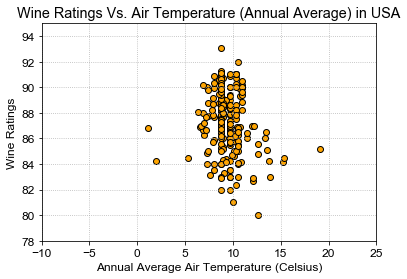

In [63]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
x1 = post_process["Avg. Air Temp (C)"]
y1 = post_process["Wine Ratings"]
plt.xlim(-10, 25)
plt.ylim(78, 95)
plt.scatter(x1, y1, marker="o", facecolors="orange", edgecolors="black")
plt.title("Wine Ratings Vs. Air Temperature (Annual Average) in USA")
plt.xlabel("Annual Average Air Temperature (Celsius)")
plt.ylabel("Wine Ratings", fontname="Arial", fontsize=12)
plt.grid(linestyle='dotted')
plt.savefig("../data/output_data/Ratings_Air_Temp.png",dpi=200)

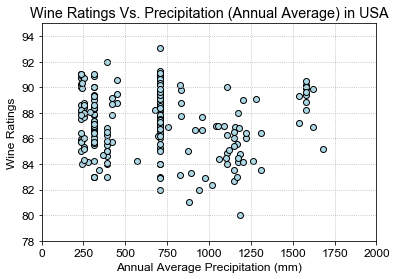

In [64]:
x1 = post_process["Precipitation(mm)"]
y1 = post_process["Wine Ratings"]
plt.xlim(0, 2000)
plt.ylim(78, 95)
plt.scatter(x1, y1, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("Wine Ratings Vs. Precipitation (Annual Average) in USA")
plt.xlabel("Annual Average Precipitation (mm)")
plt.ylabel("Wine Ratings")
plt.grid(linestyle='dotted')
plt.savefig("../data/output_data/Ratings_Precip.png",dpi=200)

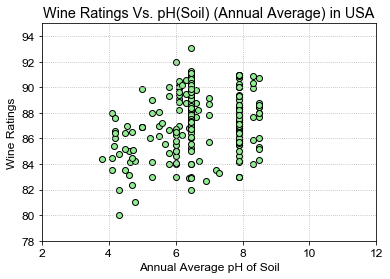

In [65]:
x1 = post_process["pH(Soil)"]
y1 = post_process["Wine Ratings"]
plt.xlim(2, 12)
plt.ylim(78, 95)
plt.scatter(x1, y1, marker="o", facecolors="lightgreen", edgecolors="black")
plt.title("Wine Ratings Vs. pH(Soil) (Annual Average) in USA")
plt.xlabel("Annual Average pH of Soil")
plt.ylabel("Wine Ratings")
plt.grid(linestyle='dotted')
plt.savefig("../data/output_data/Ratings_Soil_pH.png",dpi=200)


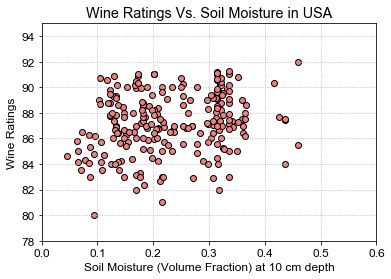

In [66]:
x1 = post_process["Soil Moisture"]
y1 = post_process["Wine Ratings"]
plt.xlim(0, 0.6)
plt.ylim(78, 95)
plt.scatter(x1, y1, marker="o", facecolors="lightcoral", edgecolors="black")
plt.title("Wine Ratings Vs. Soil Moisture in USA")
plt.xlabel("Soil Moisture (Volume Fraction) at 10 cm depth")
plt.ylabel("Wine Ratings")
plt.grid(linestyle='dotted')
plt.savefig("../data/output_data/Ratings_Soil_Moisture.png",dpi=200)


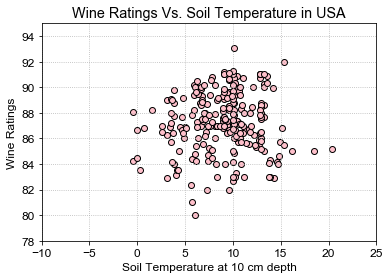

In [67]:
x1 = post_process["Soil Temperature (C) at 10 cm depth"]
y1 = post_process["Wine Ratings"]
plt.xlim(-10, 25)
plt.ylim(78, 95)
plt.scatter(x1, y1, marker="o", facecolors="pink", edgecolors="black")
plt.title("Wine Ratings Vs. Soil Temperature in USA")
plt.xlabel("Soil Temperature at 10 cm depth")
plt.ylabel("Wine Ratings")
plt.grid(linestyle='dotted')
plt.savefig("../data/output_data/Ratings_Soil_Temp.png",dpi=200)


In [68]:
# We are geo-coding the country, province and region_1 in Wine Data into latitude and longitude pair via Google Cloud Maps 
# API. Then for each location we are evaluating the Number of Varieties of Wine grown in that
#particular location. Finally we are visualizing the Wine hot-spots (number of varieties in each location) in Google
#Satellite Map of the World.

In [69]:
# We do not have city or zip codes, so we are going to geocode the area that is a 
#combination of region_1, province and the country
target_area = (dropped_wine["region_1"]+","+dropped_wine["province"]+","+dropped_wine["country"])
type(target_area)

pandas.core.series.Series

In [70]:
# Getting the series for unique varieties of Wine
unique_variety = dropped_wine["variety"]
type(unique_variety)

pandas.core.series.Series

In [71]:
#Creating a separate dataframe for Location and Wine Varities 
wv = pd.DataFrame({"Location": target_area,"Wine Variety": unique_variety})
wv_group = wv.groupby("Location")

#Counting the number of unique varities of wine for a particular location as defined by region_1,province and country
num_varieties = pd.DataFrame(wv_group["Wine Variety"].nunique()).reset_index()
#just sampling for testing purposes
#sample_num_varieties = num_varieties.sample(1000)
sample_num_varieties = num_varieties

In [72]:
#Geocoding the Location in this section via Google Maps API 
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# Loop through the locations and run a lat/long search for each city
for idx, row in sample_num_varieties.iterrows():
#    print(idx)
    sample_target = row["Location"]
    # update address key value
    params['address'] = f"{sample_target}"
    # make request
    location_lat_lng = requests.get(base_url, params=params)
    # convert to json
    location_lat_lng = location_lat_lng.json()
    try:
        sample_num_varieties.loc[idx, "Lat"] = location_lat_lng["results"][0]["geometry"]["location"]["lat"]
        sample_num_varieties.loc[idx, "Lng"] = location_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")
        continue
# Visualize to confirm lat lng appear
sample_num_varieties = sample_num_varieties.dropna()

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [73]:
sample_num_varieties

Location  Wine Variety  \
0                           Abruzzo,Central Italy,Italy             3   
1                       Adelaida District,California,US            10   
2              Adelaide Hills,South Australia,Australia            16   
3                    Adelaide,South Australia,Australia            10   
5            Aglianico del Taburno,Southern Italy,Italy             1   
6            Aglianico del Vulture,Southern Italy,Italy             1   
7                     Agrelo,Mendoza Province,Argentina             9   
8                 Albana di Romagna,Central Italy,Italy             1   
9                          Albemarle County,Virginia,US             1   
10                       Alcamo,Sicily & Sardinia,Italy             2   
11                               Alella,Catalonia,Spain             4   
12                       Alexander Valley,California,US            32   
13                      Alghero,Sicily & Sardinia,Italy             3   
14                               Alicante,Levante,Spain             8   
15                   Alicante-Marina Alta,Levante,Spain             1   
16                          Almansa,Central Spain,Spain             4   
17                         Aloxe-Corton,Burgundy,France             1   
18                                 Alsace,Alsace,France            18   
19                            Alta Langa,Piedmont,Italy             1   
20                              Alta Mesa,California,US             3   
21                 Alta Valle della Greve,Tuscany,Italy             1   
22          Alto Adige Terlano,Northeastern Italy,Italy             3   
23     Alto Adige Valle Isarco,Northeastern Italy,Italy             7   
24                  Alto Adige,Northeastern Italy,Italy            24   
25         Alto Valle de Uco,Mendoza Province,Argentina             1   
26             Alto Valle del Río Negro,Other,Argentina             3   
27                          Amador County,California,US            20   
28                            Amador-Napa,California,US             1   
29     Amarone della Valpolicella Classico,Veneto,Italy             2   
30    Amarone della Valpolicella Valpantena,Veneto,I...             1   
...                                                 ...           ...   
1055               Virginia's Eastern Shore,Virginia,US             2   
1056                               Virginia,Virginia,US            24   
1057                        Viré-Clessé,Burgundy,France             1   
1058            Vista Flores,Mendoza Province,Argentina             3   
1059          Vittoria Frappato,Sicily & Sardinia,Italy             1   
1060                   Vittoria,Sicily & Sardinia,Italy             3   
1061                             Volnay,Burgundy,France             1   
1062                      Vosne-Romanée,Burgundy,France             1   
1063                            Vougeot,Burgundy,France             2   
1064                        Vouvray,Loire Valley,France             1   
1065                        Wahluke Slope,Washington,US            24   
1066                  Walla Walla Valley (OR),Oregon,US            16   
1067              Walla Walla Valley (WA),Washington,US            35   
1068                           Washington,Washington,US            33   
1069      Western Australia,Western Australia,Australia            12   
1070       Western Connecticut Highlands,Connecticut,US             2   
1071           Western Plains,New South Wales,Australia             2   
1072                        Willamette Valley,Oregon,US            18   
1073             Wrattonbully,South Australia,Australia             7   
1074                    Yadkin Valley,North Carolina,US             3   
1075                        Yakima Valley,Washington,US            42   
1076                           Yamhill County,Oregon,US             2   
1077                 Yamhill-Carlton District,Oregon,US             4   
1078                    Yarra Va

In [74]:
# Configure gmaps
gmaps.configure(api_key=gkey)
#Creating google heat maps
num = sample_num_varieties["Wine Variety"].tolist()
# Create a map using state centroid coordinates to set markers
marker_locations = sample_num_varieties[['Lat', 'Lng']]
figure_layout = {
    'width': '1200px',
    'height': '1200px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)


# Create a marker_layer using the poverty list to fill the info box
heat_layer = gmaps.heatmap_layer(marker_locations, weights=num, 
                                 dissipating=True, max_intensity=10,
                                point_radius=3.5)


fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='1200px', margin='0 auto 0 auto', padding='1px', w…

In [75]:
# Focusing on the price range by location

In [76]:
frame_df=dropped_wine[["country","region_1","price"]]

frame_df

country                   region_1  price
0           US                Napa Valley  235.0
1        Spain                       Toro  110.0
2           US             Knights Valley   90.0
3           US          Willamette Valley   65.0
4       France                     Bandol   66.0
5        Spain                       Toro   73.0
6        Spain                       Toro   65.0
7        Spain                       Toro  110.0
8           US         Chehalem Mountains   65.0
9           US               Sonoma Coast   60.0
10       Italy                     Collio   80.0
11          US               Ribbon Ridge   48.0
12          US               Dundee Hills   48.0
13      France                    Madiran   90.0
14          US               Dundee Hills  185.0
15          US          Willamette Valley   90.0
16          US  Diamond Mountain District  325.0
17       Spain           Ribera del Duero   80.0
18      France                     Cahors  290.0
19          US               Sonoma Coast   75.0
20          US                Napa Valley   24.0
21       Spain                      Rioja   79.0
22       Spain                       Toro  220.0
23          US                Edna Valley   60.0
24          US       Santa Cruz Mountains   45.0
26          US          Willamette Valley   62.0
27          US          Willamette Valley  105.0
28          US      Santa Lucia Highlands   60.0
29          US    Walla Walla Valley (WA)   60.0
31          US       Russian River Valley   37.0
...        ...                        ...    ...
150807      US                Edna Valley   20.0
150812      US                Napa Valley   25.0
150827      US           Dry Creek Valley   60.0
150831      US       Russian River Valley   22.0
150836      US                 California   10.0
150856      US                 California    8.0
150861      US              Sonoma County   16.0
150873      US              Amador County    7.0
150883      US                 California    7.0
150889      US          Santa Ynez Valley   35.0
150892      US                 California   10.0
150906  France              Vosne-Romanée   65.0
150907  France              Vosne-Romanée   52.0
150908  France              Vosne-Romanée   65.0
150909  France          Nuits-St.-Georges   52.0
150911  France          Nuits-St.-Georges   37.0
150912  France          Chambolle-Musigny   65.0
150914      US            Anderson Valley   25.0
150915      US                North Coast   30.0
150916      US                Napa Valley   65.0
150917  France                  Champagne   30.0
150918  France                  Champagne   38.0
150919  France                  Champagne   37.0
150920   Italy                     Trento   19.0
150921  France                  Champagne   38.0
150923  France                  Champagne   30.0
150924  France                  Champagne   70.0
150926  France                  Champagne   27.0
150927   Italy          Fiano di Avellino   20.0
150928  France                  Champagne   52.0

[77284 rows x 3 columns]

In [77]:
frame_df.describe()

price
count  77284.000000
mean      37.584817
std       36.403885
min        4.000000
25%       18.000000
50%       29.000000
75%       45.000000
max     2013.000000

In [78]:
bins=[0,15,30,50,100,500,2500]
group_names=["Max Price $15", "Max Price $30", "Max Price $50", "Max Price $100","Max Price $500","More than $500"]
frame_df["Price Range"]=pd.cut(frame_df["price"],bins,labels=group_names)

frame_df

/Users/Saurav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


country                   region_1  price     Price Range
0           US                Napa Valley  235.0  Max Price $500
1        Spain                       Toro  110.0  Max Price $500
2           US             Knights Valley   90.0  Max Price $100
3           US          Willamette Valley   65.0  Max Price $100
4       France                     Bandol   66.0  Max Price $100
5        Spain                       Toro   73.0  Max Price $100
6        Spain                       Toro   65.0  Max Price $100
7        Spain                       Toro  110.0  Max Price $500
8           US         Chehalem Mountains   65.0  Max Price $100
9           US               Sonoma Coast   60.0  Max Price $100
10       Italy                     Collio   80.0  Max Price $100
11          US               Ribbon Ridge   48.0   Max Price $50
12          US               Dundee Hills   48.0   Max Price $50
13      France                    Madiran   90.0  Max Price $100
14          US               Dundee Hills  185.0  Max Price $500
15          US          Willamette Valley   90.0  Max Price $100
16          US  Diamond Mountain District  325.0  Max Price $500
17       Spain           Ribera del Duero   80.0  Max Price $100
18      France                     Cahors  290.0  Max Price $500
19          US               Sonoma Coast   75.0  Max Price $100
20          US                Napa Valley   24.0   Max Price $30
21       Spain                      Rioja   79.0  Max Price $100
22       Spain                       Toro  220.0  Max Price $500
23          US                Edna Valley   60.0  Max Price $100
24          US       Santa Cruz Mountains   45.0   Max Price $50
26          US          Willamette Valley   62.0  Max Price $100
27          US          Willamette Valley  105.0  Max Price $500
28          US      Santa Lucia Highlands   60.0  Max Price $100
29          US    Walla Walla Valley (WA)   60.0  Max Price $100
31          US       Russian River Valley   37.0   Max Price $50
...        ...                        ...    ...             ...
150807      US                Edna Valley   20.0   Max Price $30
150812      US                Napa Valley   25.0   Max Price $30
150827      US           Dry Creek Valley   60.0  Max Price $100
150831      US       Russian River Valley   22.0   Max Price $30
150836      US                 California   10.0   Max Price $15
150856      US                 California    8.0   Max Price $15
150861      US              Sonoma County   16.0   Max Price $30
150873      US              Amador County    7.0   Max Price $15
150883      US                 California    7.0   Max Price $15
150889      US          Santa Ynez Valley   35.0   Max Price $50
150892      US                 California   10.0   Max Price $15
150906  France              Vosne-Romanée   65.0  Max Price $100
150907  France              Vosne-Romanée   52.0  Max Price $100
150908  France              Vosne-Romanée   65.0  Max Price $100
150909  France          Nuits-St.-Georges   52.0  Max Price $100
150911  France          Nuits-St.-Georges   37.0   Max Price $50
150912  France          Chambolle-Musigny   65.0  Max Price $100
150914      US            Anderson Valley   25.0   Max Price $30
150915      US                North Coast   30.0   Max Price $30
150916      US                Napa Valley   65.0  Max Price $100
150917  France                  Champagne   30.0   Max Price $30
150918  France                  Champagne   38.0   Max Price $50
150919  France                  Champagne   37.0   Max Price $50
150920   Italy                     Trento   19.0   Max Price $30
150921  France                  Champagne   38.0   Max Price $50
150923  France                  Champagne   30.0   Max Price $30
150924  France                  Champagne   70.0  Max Price $100
150926  France                  Champagne   27.0   Max Price $30
150927   Italy          Fiano di Avellino   20.0   Max Price $30
150928  France                  Champagne 

<Figure size 720x2880 with 0 Axes>

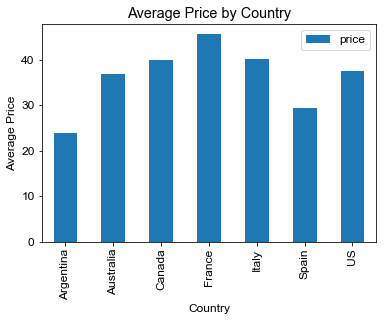

In [79]:
indexme=frame_df.set_index("country")
indexme
fig = plt.figure(figsize=(10,40))
countryplot=indexme.groupby("country").mean().plot(kind="bar")
countryplot.set_xlabel("Country")
countryplot.set_ylabel("Average Price")
countryplot.plot
plt.title("Average Price by Country")
plt.savefig("../data/output_data/countryprice.png",dpi=200,bbox_inches='tight')


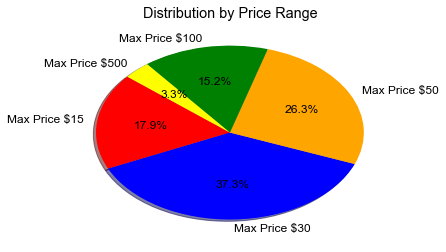

In [80]:
#us_data=indexme.loc["US","price"]

#length of wines that cost between
low=indexme["Price Range"]=="Max Price $15"
truelowprice=len(indexme.loc[low, :])

#length of wines that cost between $500 and $1,000
low2=indexme["Price Range"]=="Max Price $30"
truelow2=len(indexme.loc[low2, :])

#length of wines that cost between $1,000 and $1,500
mid1=indexme["Price Range"]=="Max Price $50"
truemid1=len(indexme.loc[mid1,:])

#length of wines that cost more than $1,500
mid2=indexme["Price Range"]=="Max Price $100"
truemid2=len(indexme.loc[mid2,:])

high1=indexme["Price Range"]=="Max Price $500"
truehigh1=len(indexme.loc[high1,:])

#start creating the pie chart
labels = ["Max Price $15", "Max Price $30", "Max Price $50", "Max Price $100","Max Price $500"]
sizes=[truelowprice,truelow2,truemid1,truemid2,truehigh1]
colors=["red","blue","orange","green","yellow"]
explode=(0,0,0,0,0)


#create the pie chart based upon the values above
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.title("Distribution by Price Range")
plt.savefig("../data/output_data/pricepiechart.png",dpi=200)